# **Hotel Booking Cancellation Prediction: A Machine Learning Approach**
Created By : Muhammad Rizky Indrawan

---

### **Contents**
1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Data Analysis
5. Modelling and Evaluation
6. Conclusion
7. Recommendation


# **1. Business Problem Understanding**

### **1.1 Context**  
Sebuah perusahaan perhotelan ingin mengoptimalkan proses pengelolaan pemesanan kamar. Salah satu tantangan terbesar yang dihadapi adalah tingginya tingkat pembatalan (cancellation) oleh pelanggan. Pembatalan yang tidak terprediksi menyebabkan kerugian finansial, penurunan efisiensi operasional, dan berkurangnya peluang untuk menjual kembali kamar yang dibatalkan.

Pihak-pihak yang Berkepentingan (**Stakeholder**):
- **Manajemen Hotel**: Sangat berkepentingan dalam mengurangi kerugian finansial akibat pembatalan dan meningkatkan efisiensi operasional secara keseluruhan melalui pengelolaan inventaris kamar yang lebih baik dan peningkatan pendapatan.
- **Departemen Penjualan dan Pemasaran**: Berkepentingan dalam meningkatkan tingkat hunian kamar dan efektivitas kampanye pemasaran dengan memahami pola pembatalan untuk menargetkan segmen pelanggan yang lebih stabil dan mengurangi risiko pembatalan.

Dengan banyaknya data pemesanan yang tersimpan dalam sistem mereka, termasuk informasi tentang segmen pelanggan, jenis deposit, permintaan khusus, dan riwayat pembatalan, perusahaan ingin memanfaatkannya untuk membuat keputusan yang lebih tepat.

Target :

- 0 : Pemesanan tidak dibatalkan (booking lanjut)

- 1 : Pemesanan dibatalkan (booking cancel)

### **1.2 Problem Statement** 

Pembatalan pemesanan mengganggu estimasi pendapatan dan operasional hotel, terutama jika terjadi mendadak. Jika hotel tidak dapat mengidentifikasi lebih awal kemungkinan suatu pemesanan akan dibatalkan, maka akan sulit untuk melakukan tindakan seperti overbooking, penawaran ulang kamar, atau menargetkan promosi khusus. Tanpa strategi prediksi yang baik, perusahaan akan terus mengalami kerugian karena sumber daya yang tidak digunakan secara maksimal.

### **1.3 Goals**

Berdasarkan permasalahan tersebut, perusahaan perhotelan ingin memiliki kemampuan untuk memprediksi kemungkinan suatu pemesanan akan dibatalkan atau tidak. Dengan model prediksi tersebut, perusahaan dapat mengantisipasi risiko pembatalan lebih awal sehingga dapat mengambil tindakan yang tepat seperti strategi overbooking, penjadwalan ulang, atau penawaran ulang kamar kepada pelanggan lain.

Selain itu, perusahaan juga ingin mengetahui faktor-faktor utama yang memengaruhi pembatalan, sehingga dapat menyusun strategi yang lebih tepat dalam menangani pelanggan dan mengelola kebijakan pemesanan secara lebih efektif.

### **1.4 Analytic Approach**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pemesanan yang dibatalkan dan yang tidak dibatalkan.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk memprediksi kemungkinan suatu pemesanan akan dibatalkan atau tidak, sehingga perusahaan dapat mengambil tindakan yang lebih tepat untuk mengurangi kerugian akibat pembatalan mendadak.

### **1.5 Metric Evaluation**

Evaluasi metrik dalam pemodelan machine learning adalah penggunaan ukuran kuantitatif untuk menilai kinerja model dalam memprediksi atau mengklasifikasikan data secara akurat. Metrik ini menjadi indikator keberhasilan model dalam mempelajari dan mengeneralisasi pola data.

![alt text](confusion-matrix-1.jpg)

- `Type 1 Error : False Positive (FP)`
Model memprediksi bahwa pemesanan akan dibatalkan (1), padahal pelanggan tetap datang.
    - **Konsekuensi:** Hotel menjual kembali kamar tersebut (overbooking), yang berisiko menimbulkan ketidaknyamanan bagi tamu yang tetap datang atau kekecewaan pelanggan.
    - **Cost False Positive (FP): €25** per malam per pemesanan.
        - Angka ini merupakan perkiraan biaya rata-rata yang mungkin timbul bagi hotel per pemesanan ketika model salah memprediksi pembatalan. Biaya ini diasumsikan untuk menutupi tindakan yang perlu diambil hotel akibat overbooking, seperti memberikan upgrade kamar kepada tamu, menawarkan kompensasi berupa layanan tambahan gratis, atau biaya selisih jika harus merelokasi tamu ke hotel lain dengan tarif yang berbeda. Hotel akan berusaha menekan biaya ini agar tidak melebihi potensi pendapatan kamar.

- `Type 2 Error : False Negative (FN)`
Model memprediksi bahwa pemesanan tidak dibatalkan (0), padahal ternyata pelanggan membatalkan.
    - **Konsekuensi:** Hotel kehilangan kesempatan untuk menjual kembali kamar tersebut, sehingga pendapatan berpotensi hilang.
    - **Cost False Negative (FN): €160** per malam per pemesanan.
        - Angka ini merupakan perkiraan potensi kerugian pendapatan per pemesanan per malam yang dialami hotel ketika model gagal memprediksi pembatalan yang sebenarnya terjadi. Kerugian ini timbul karena kamar tetap kosong dan hotel kehilangan kesempatan untuk menjualnya kepada pelanggan lain.

[Sumber](https://www.statista.com/statistics/545281/daily-hotel-rates-lisbon/)

Di antara kedua jenis kesalahan tersebut, **False Negative memiliki dampak bisnis yang lebih serius** karena menyangkut langsung pada potensi kerugian finansial akibat kamar yang tidak terjual. Oleh karena itu, model yang dibangun harus mampu mendeteksi sebanyak mungkin kasus pembatalan yang benar, meskipun hal ini mungkin menyebabkan sedikit peningkatan dalam False Positive.

Untuk alasan tersebut, metrik evaluasi yang paling sesuai adalah `F2 Score`, karena metrik ini memberikan bobot lebih besar pada recall dibanding precision. Dengan `F2 Score`, model lebih fokus dalam **mendeteksi sebanyak mungkin kasus pembatalan (recall), namun tetap menjaga precision agar prediksi tidak terlalu berlebihan**. Ini menjadikannya pilihan ideal dalam kasus di mana kegagalan mendeteksi pembatalan lebih merugikan dibandingkan salah memprediksi pembatalan.

# **2. Data Understanding**

Dataset source : https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL

Note : 
- Feature 'is_canceled' adalah target dalam kasus ini untuk dipresiksi (variabel dependent).
- Feature - feature lainnya akan menjadi feature pendukung untuk memprediksi pembatalan pemesanan (variabel independent).
- Setiap baris data merepresentasikan informasi terkait pemesanan kamar hotel dan detailnya.

### **2.1 Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| country | object | Negara asal |
| market_segment | object | Penunjukan segmen pasar |
| previous_cancellations | Integer | Jumlah pembatalan sebelumnya oleh pelanggan |
| booking_changes | Integer | Jumlah perubahan pada pemesanan |
| deposit_type | object | Indikasi jenis deposit pemesanan |
| days_in_waiting_list | Integer | Jumlah hari dalam daftar tunggu |
| customer_type | object | Jenis pemesanan |
| reserved_room_type | object | Kode tipe kamar yang dipesan |
| required_car_parking_space | Integer | Jumlah tempat parkir mobil yang dibutuhkan |
| total_of_special_request | Integer | Jumlah permintaan khusus |
| is_canceled | Integer | Indikasi apakah pemesanan dibatalkan (1) atau tidak (0) |

### **2.2 Import Library**

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Library
import pandas as pd
import numpy as np
from datetime import timedelta
import pickle

# Set max columns
pd.set_option('display.max_columns', None)
# To change scientific notation into decimal
pd.options.display.float_format = '{:.4f}'.format

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Statistics
from scipy.stats import chi2_contingency, mannwhitneyu

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder, OneHotEncoder 
from sklearn.preprocessing import RobustScaler

# Model Selection
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN

### **2.3 Load Dataset**

In [2]:
df = pd.read_csv("data_hotel_booking_demand.csv")
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


Selanjutnya, kita akan membuat ringkasan deskriptif setiap kolom dalam bentuk DataFrame menggunakan fungsi **display_unique**. Ringkasan ini akan menyajikan nama kolom, tipe data, jumlah dan persentase nilai null, total nilai unik, serta contoh nilai unik. Tujuannya adalah untuk memberikan pemahaman ringkas mengenai tipe data, keberadaan nilai hilang, dan variasi nilai di setiap kolom dataset.

In [4]:
def display_unique(df):
    listUniqueItem  = []
    for col in df.columns :
        listUniqueItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                        df[col].nunique(), df[col].unique()])

    tableDesc  = pd.DataFrame(columns=['Column Name', 'Data Type', 'Null', 'NullPct', 'Total of Unique', 'Unique Sample'],
                        data=listUniqueItem)
    return tableDesc 

display_unique(df)

,Column Name,Data Type,Null,NullPct,Total of Unique,Unique Sample
0,country,object,351,0.4200,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0,0.0000,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,int64,0,0.0000,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,int64,0,0.0000,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,object,0,0.0000,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0,0.0000,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,object,0,0.0000,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0,0.0000,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0,0.0000,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0,0.0000,6,"[0, 2, 1, 3, 4, 5]"


- DataFrame `df` memiliki 11 kolom. Sebagian besar kolom (`market_segment, previous_cancellations, booking_changes, deposit_type, days_in_waiting_list, customer_type, reserved_room_type, required_car_parking_spaces, total_of_special_requests, is_canceled`) memiliki tipe data yang sesuai dan tidak memiliki nilai null. 
- Kolom `country` memiliki tipe data object, mengandung 351 nilai null (sekitar 0.42%), dan memiliki 162 nilai unik. 
- Kolom-kolom lainnya memiliki jumlah nilai unik yang bervariasi, dengan `days_in_waiting_list` memiliki jumlah nilai unik terbanyak (115) di antara kolom tanpa null.

# **3. Data Cleaning**

Sekarang, kita akan membersihkan data sebelum dianalisis. Tahap pembersihan data ini penting sekali karena data yang kurang baik bisa mempengaruhi hasil analisis kita nanti. Biasanya, proses membersihkan data meliputi mengatasi nilai yang hilang (missing values), data yang aneh atau tidak biasa (anomali), format data yang berbeda-beda, dan data yang sama persis berulang (duplikat).

## **3.1 Missing Value**

Missing value atau nilai yang hilang adalah kondisi ketika suatu data tidak memiliki isian atau nilai. Dalam sebuah dataset, missing value seringkali ditandai dengan simbol atau kode khusus. Contohnya yang umum kita temui adalah NaN (yang artinya Bukan Angka), NA (yang artinya Tidak Tersedia), Undefined (Tidak Terdefinisi), Unknown (Tidak Diketahui), atau bahkan tanda tanya '?'.

In [5]:
# Check null values
df_null = pd.DataFrame({'Null Values' : df.isnull().sum(),
                        'Percentage Null Values' :
                         (df.isna().sum()) / (df.shape[0]) * (100)})
df_null = df_null[df_null['Null Values']>0]
df_null.sort_values('Percentage Null Values', ascending=False)

,Null Values,Percentage Null Values
country,351,0.4200


Ada data yang hilang/kosong pada salah satu kolom yaitu `country`. Maka kita akan memperbaiki datanya dan membuatnya menjadi siap pakai untuk melakukan analisa terhadap masalahnya dan juga pembuatan model machine learningnya.

Selanjutnya kita coba visualisasikan missing values atau data yang hilang pada dataframe kita dengan menggunakan library missingno

[Sumber 1](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009/)

#### **Bar Plot**

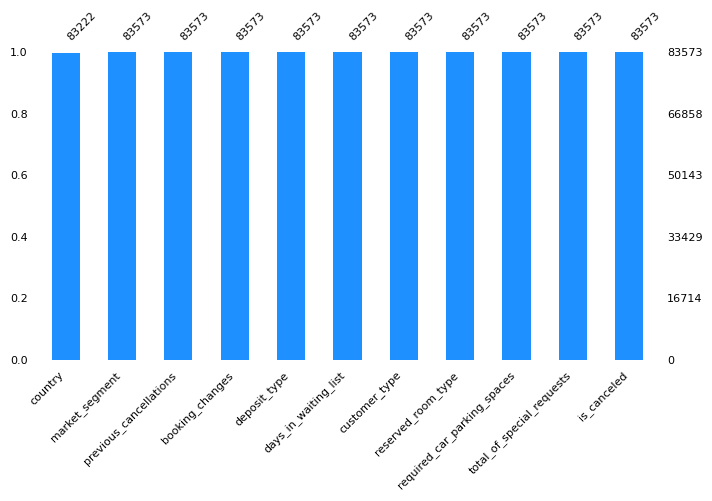

In [6]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(8,4), fontsize=8);

- Terlihat dari Bar Plot tersebut, bahwa hanya pada kolom 'country' yang memiliki missing values/data yang hilang.

#### **Matrix Plot**

<Axes: >

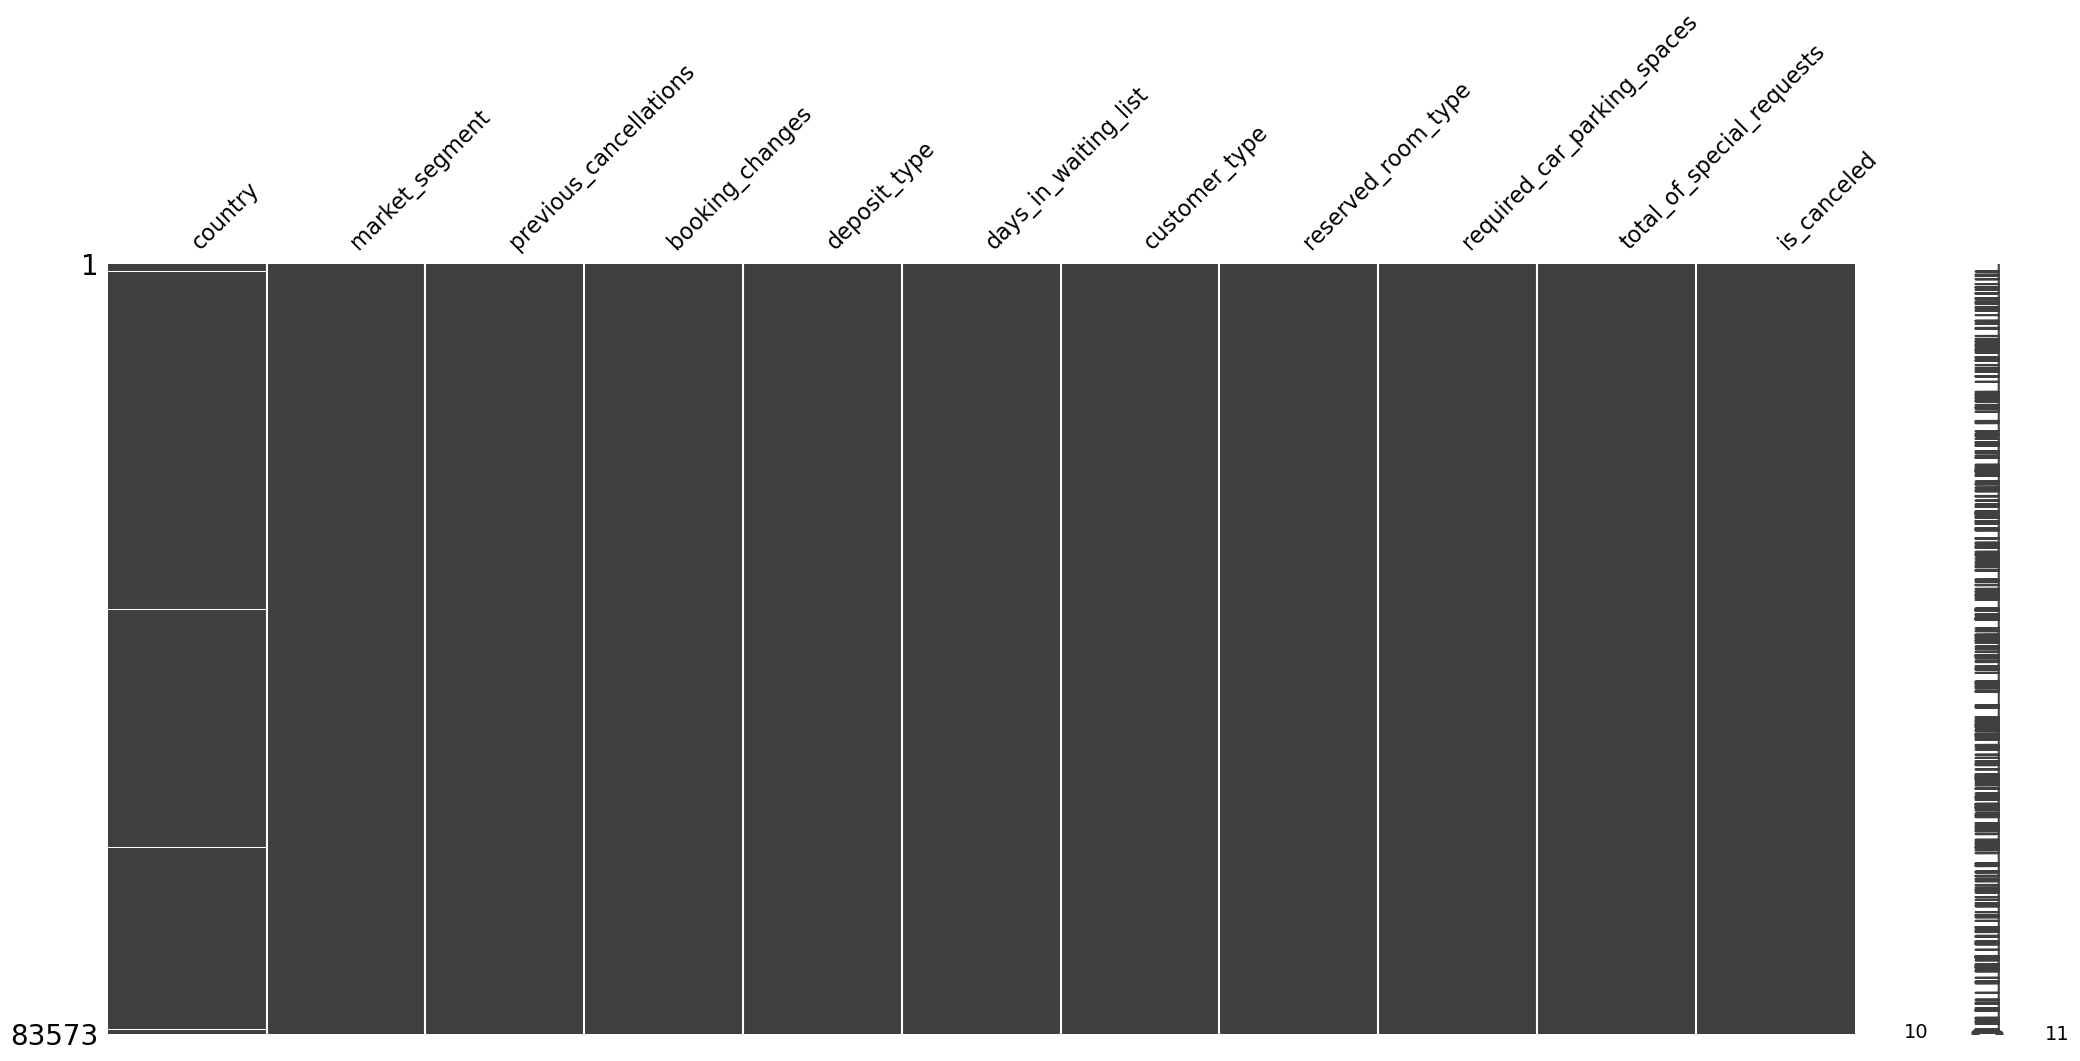

In [7]:
missingno.matrix(df)

- Terlihat dari Matrix Plot, hilangnya data pada kolom country tampaknya terjadi secara acak dan tidak terkait secara langsung dengan hilangnya data di kolom lain. Dan sebagian besar fitur dalam dataset ini memiliki data yang lengkap

#### **Dendrogram**

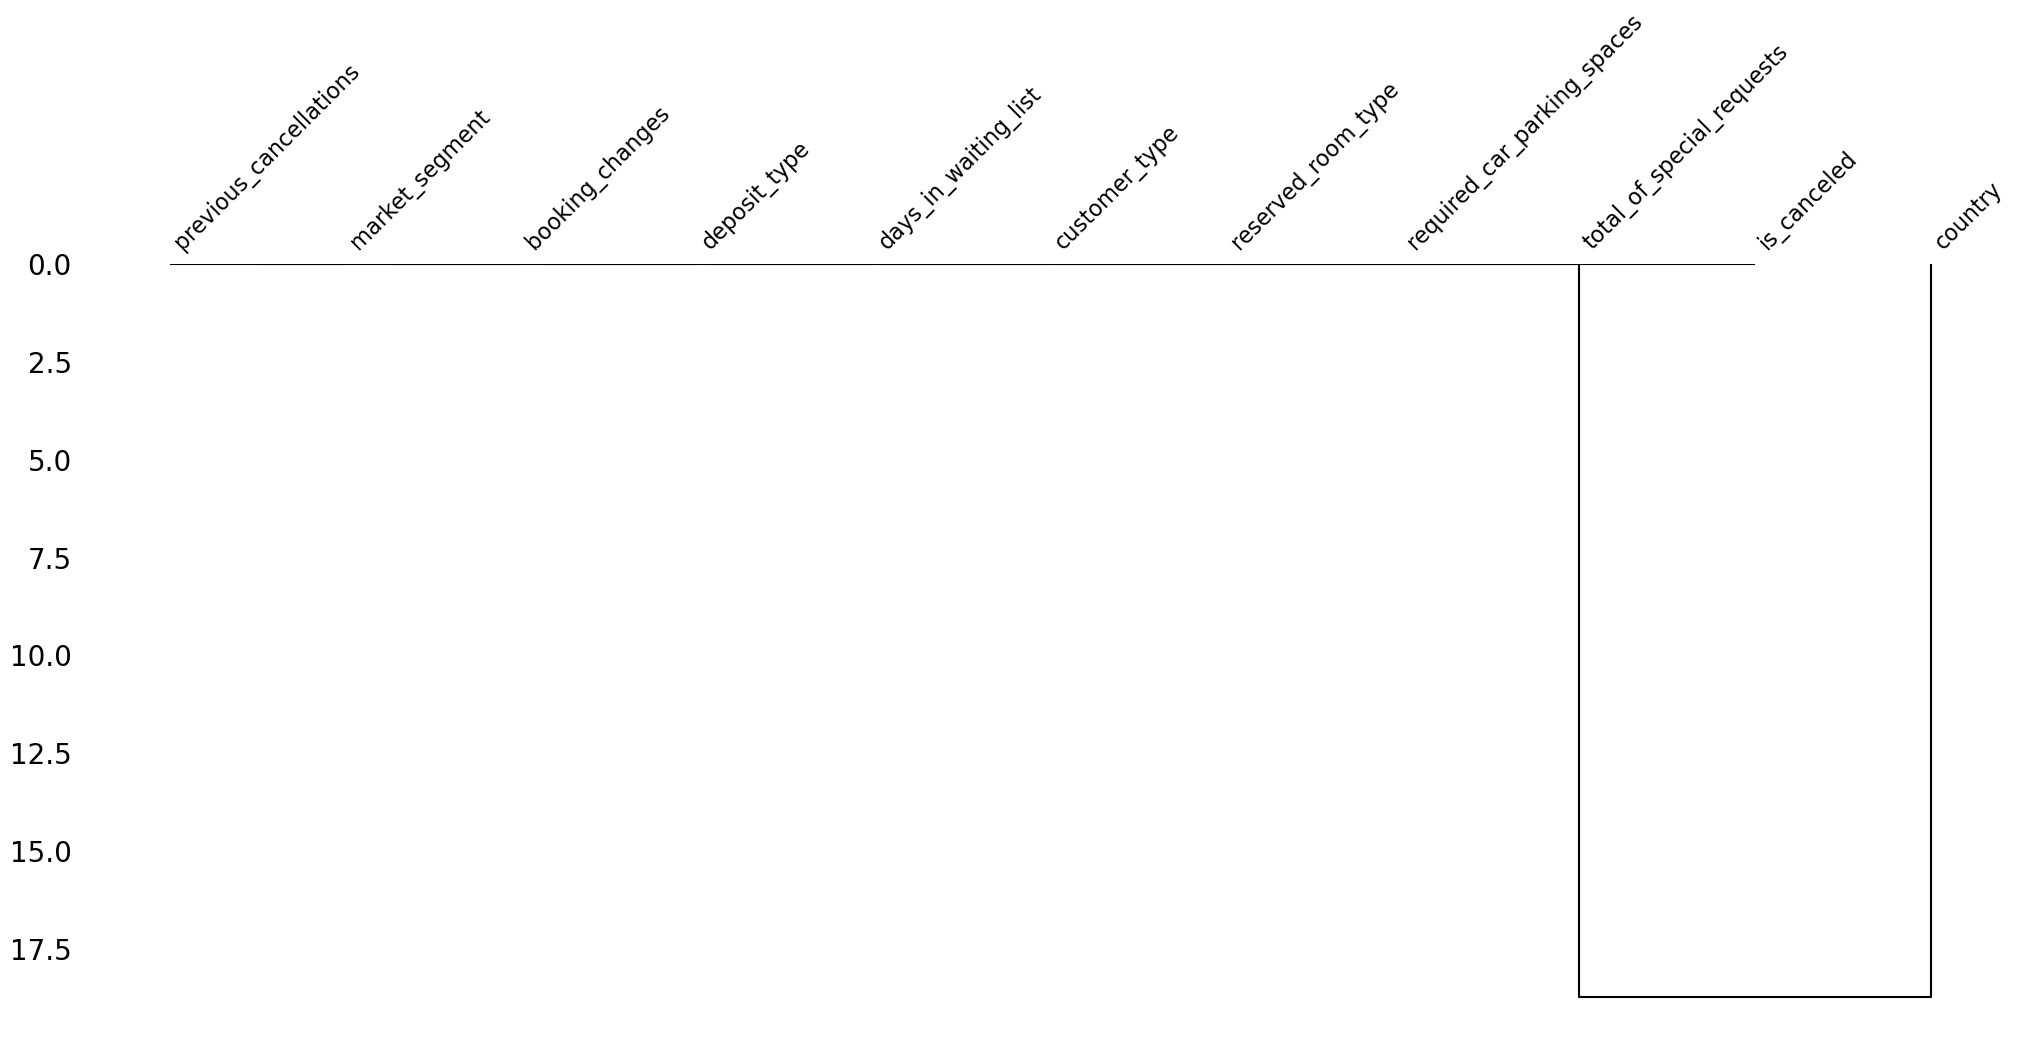

In [8]:
missingno.dendrogram(df)
plt.show()

- Kolom `country` memiliki pola missing value yang berbeda secara signifikan dari kolom-kolom lainnya. Ini konsisten dengan temuan bahwa 'country' adalah satu-satunya kolom dengan sejumlah missing value. Kemudian kolom 'market_segment', 'previous_cancellations', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests', dan 'is_canceled' berada di titik 0 karena mereka tidak mempunyai missing values/data.

Munculnya missing value dapat disebabkan oleh berbagai faktor, antara lain:
- Kesalahan saat memasukkan data (data entry errors).
- Masalah teknis dalam proses pengumpulan data (issues on the technical front in the data collection process).
- File yang hilang atau rusak (lost/corrupt files).
- Berbagai alasan lainnya (many other reasons).

[Sumber 2](https://towardsdatascience.com/why-you-should-handle-missing-data-and-heres-how-to-do-it-270c321a4d6f/#:~:text=Missing%20data%20values%20are%20almost,files%2C%20and%20many%20other%20reasons.)


Untuk mengatasi sedikitnya missing value di kolom `country`, saya memilih imputasi sederhana dengan mengisi nilai yang hilang sebagai 'Unknown'. Tujuannya adalah mempertahankan semua baris data untuk analisis awal dan memberikan penanda eksplisit untuk nilai yang tidak tersedia. Metode ini cepat, tidak menghilangkan baris, dan memungkinkan penanganan lebih lanjut jika diperlukan.

In [9]:
# Replace Missing Values
# country: replace with Unknown value
df.fillna({"country": "Unknown"}, inplace=True)

## **3.2 Data Duplicates**

Data duplikat adalah data yang identik yang tersimpan lebih dari satu kali dalam dataset. Kita akan mencari duplikat persis, yaitu baris-baris yang semua informasinya sama dengan baris lain. Data yang benar-benar sama ini biasanya muncul karena kesalahan saat memasukkan data, proses pengumpulan yang bermasalah, atau ketika menggabungkan beberapa sumber data. Karena data ganda ini tidak menambah informasi baru dan justru bisa membuat hasil analisis menjadi tidak akurat, maka data ini akan kita hapus.

In [10]:
print('Jumlah baris yang terduplikasi = ', df.duplicated().sum())

Jumlah baris yang terduplikasi =  73371


- Berdasarkan hasil di atas terdapat **73371** True Duplicates yang akan dihapus.

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10202 entries, 0 to 83565
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      10202 non-null  object
 1   market_segment               10202 non-null  object
 2   previous_cancellations       10202 non-null  int64 
 3   booking_changes              10202 non-null  int64 
 4   deposit_type                 10202 non-null  object
 5   days_in_waiting_list         10202 non-null  int64 
 6   customer_type                10202 non-null  object
 7   reserved_room_type           10202 non-null  object
 8   required_car_parking_spaces  10202 non-null  int64 
 9   total_of_special_requests    10202 non-null  int64 
 10  is_canceled                  10202 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 956.4+ KB


## **3.3 Data Outlier**

Data outlier atau data yang tidak biasa bisa sangat mempengaruhi data yang ada. Karena, data anomali bisa bikin kesalahan jadi lebih besar dan tes statistik jadi kurang kuat. Ini juga bisa bikin hasil analisis jadi condong ke arah yang salah dan mempengaruhi aturan dasar saat kita membuat model nanti.

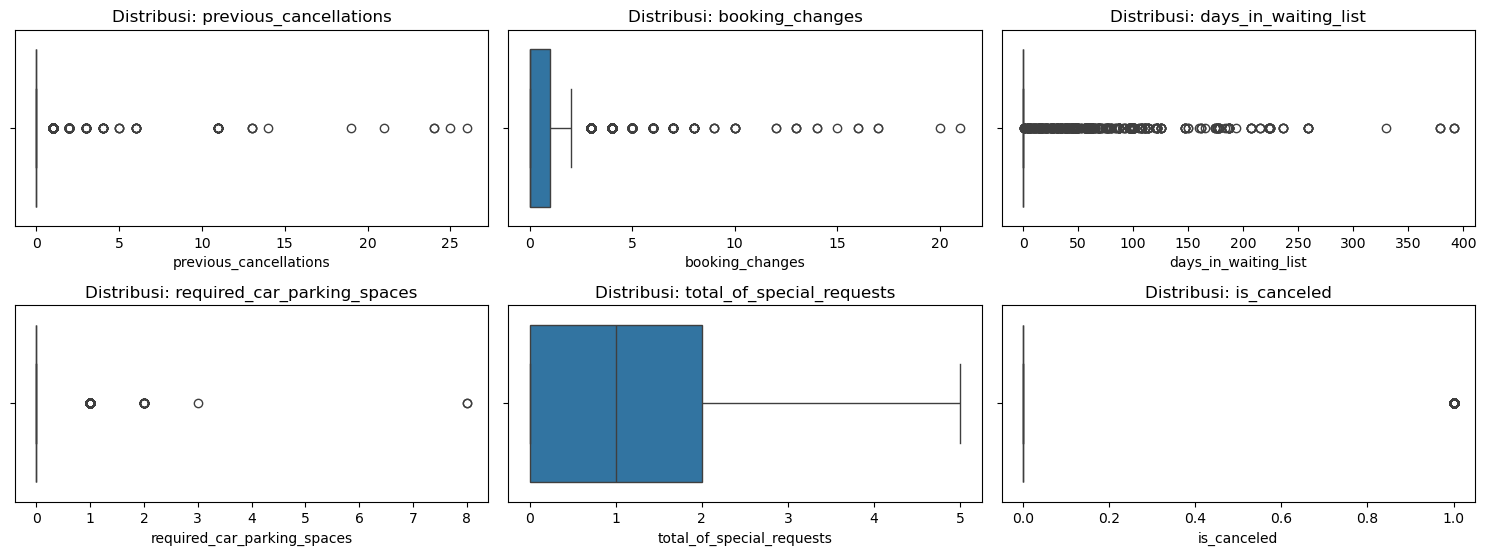

In [13]:
# Check for outliers for numerical columns
numerikal_col=df.describe().columns

plt.figure(figsize=(15, 30))
for i, data in enumerate(numerikal_col):
    plt.subplot(11, 3, i+1)
    sns.boxplot(x=df[data])
    plt.title(f'Distribusi: {data}')
    plt.xlabel(data)


plt.tight_layout()
plt.show()

- `previous_cancellations`:
    - Sebagian besar data terkumpul di nilai 0, yang mengindikasikan bahwa banyak pelanggan tidak memiliki pembatalan sebelumnya.
    - Terdapat banyak outlier di sisi kanan, menunjukkan adanya sejumlah kecil pelanggan dengan riwayat pembatalan yang cukup banyak (hingga sekitar 25 atau lebih).
- `booking_changes`:
    - Distribusi data cenderung terkonsentrasi di nilai 0 dan 1, menunjukkan bahwa sebagian besar pemesanan tidak mengalami perubahan atau hanya sedikit perubahan.
    - Terdapat sejumlah outlier di sisi kanan, mengindikasikan beberapa pemesanan mengalami banyak perubahan (hingga lebih dari 20).
- `days_in_waiting_list`:
    - Sebagian besar data terpusat di dekat 0, yang berarti banyak pemesanan langsung dikonfirmasi tanpa masuk daftar tunggu.
    - Terdapat banyak outlier di sisi kanan, menunjukkan beberapa pemesanan memiliki waktu tunggu yang sangat lama (hingga lebih dari 400 hari).
- `required_car_parking_spaces`:
    - Sebagian besar pemesanan tidak memerlukan tempat parkir (nilai 0).
    - Terdapat beberapa outlier dengan nilai 1 dan bahkan satu outlier dengan nilai 8.
- `total_of_special_requests`:
    - Distribusi cenderung berada di nilai 0, 1, dan 2, menunjukkan sebagian besar pelanggan memiliki sedikit atau tidak ada permintaan khusus.
    - Terdapat beberapa outlier di sisi kanan, mengindikasikan beberapa pelanggan memiliki banyak permintaan khusus (hingga 5).
- `is_canceled`:
    - Ini adalah variabel biner (0 dan 1), sehingga boxplot di sini menunjukkan distribusi antara pemesanan yang tidak dibatalkan (0) dan yang dibatalkan (1). Tidak ada outlier dalam pengertian nilai ekstrem di sini. Kolom ini yang nanti akan digunakan sebagai Target untuk pembuatan model machine learning nanti.

Meskipun boxplot mengidentifikasi outlier pada beberapa kolom numerikal, saya memilih untuk tidak menghapusnya pada tahap awal. Nilai-nilai ekstrem ini bisa jadi representasi valid dari kejadian yang jarang namun penting, sehingga penghapusan dini dapat membatasi kemampuan prediksi model terhadap data baru serupa. Tujuannya adalah mempertahankan informasi selengkap mungkin untuk analisis dan pemodelan mendatang.

[Sumber 3](https://towardsdatascience.com/outliers-keep-or-drop-892b599b8ab6/)

Untuk mengatasi potensi dampak outlier, scaling dengan RobustScaler akan digunakan karena ketahanannya terhadap nilai ekstrem. Metode scaling ini memastikan fitur-fitur numerikal berada pada skala yang sesuai tanpa terpengaruh oleh outlier, sehingga meminimalkan distorsi pada proses pemodelan machine learning. Penggunaan RobustScaler diharapkan dapat menghasilkan representasi data yang lebih robust dan sesuai untuk pemodelan, memanfaatkan informasi dari nilai-nilai outlier tanpa membiarkannya mendominasi skala fitur.

# **4. Data Analysis**

Tujuan utama dari analisis data adalah untuk menggali, mengolah, dan menginterpretasikan informasi yang tersembunyi dan berguna dari sekumpulan data. Proses ini tidak hanya bertujuan untuk memahami pola, tren, dan korelasi yang ada, tetapi juga untuk mendapatkan wawasan yang mendalam yang dapat menjadi landasan yang kuat dalam mengambil keputusan yang lebih tepat, strategis, dan terinformasi.

## **4.1 Descriptive Statistics**


In [14]:
# Statistik deskriptif untuk kolom numerik
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000
mean,0.0893,0.7950,3.5603,0.1671,0.9412,0.2366
std,0.8285,1.2932,22.1966,0.3938,1.0380,0.4250
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
75%,0.0000,1.0000,0.0000,0.0000,2.0000,0.0000
max,26.0000,21.0000,391.0000,8.0000,5.0000,1.0000


- Secara umum, sebagian besar pelanggan tidak memiliki riwayat pembatalan sebelumnya dan tidak memerlukan tempat parkir. Sebagian besar pemesanan mengalami sedikit atau tidak ada perubahan dan tidak masuk daftar tunggu. Jumlah permintaan khusus cenderung rendah. Tingkat pembatalan dalam dataset ini adalah sekitar 23.66%.
- Terdapat variasi yang signifikan dan potensi outlier pada kolom `previous_cancellations`, `booking_changes`, dan terutama `days_in_waiting_list`, yang terlihat dari sebaran data dan nilai ekstremnya. Meskipun demikian, outlier ini kita pertahankan karena mungkin merepresentasikan skenario pemesanan yang valid dan informatif, sehingga penghapusannya dapat menghilangkan informasi berharga dan membatasi kemampuan prediksi model untuk kasus ekstrem. Sebagai gantinya, kita akan menggunakan scaling yang robust untuk mengelola dampaknya tanpa kehilangan informasi.

## **4.2 Distributions Data**

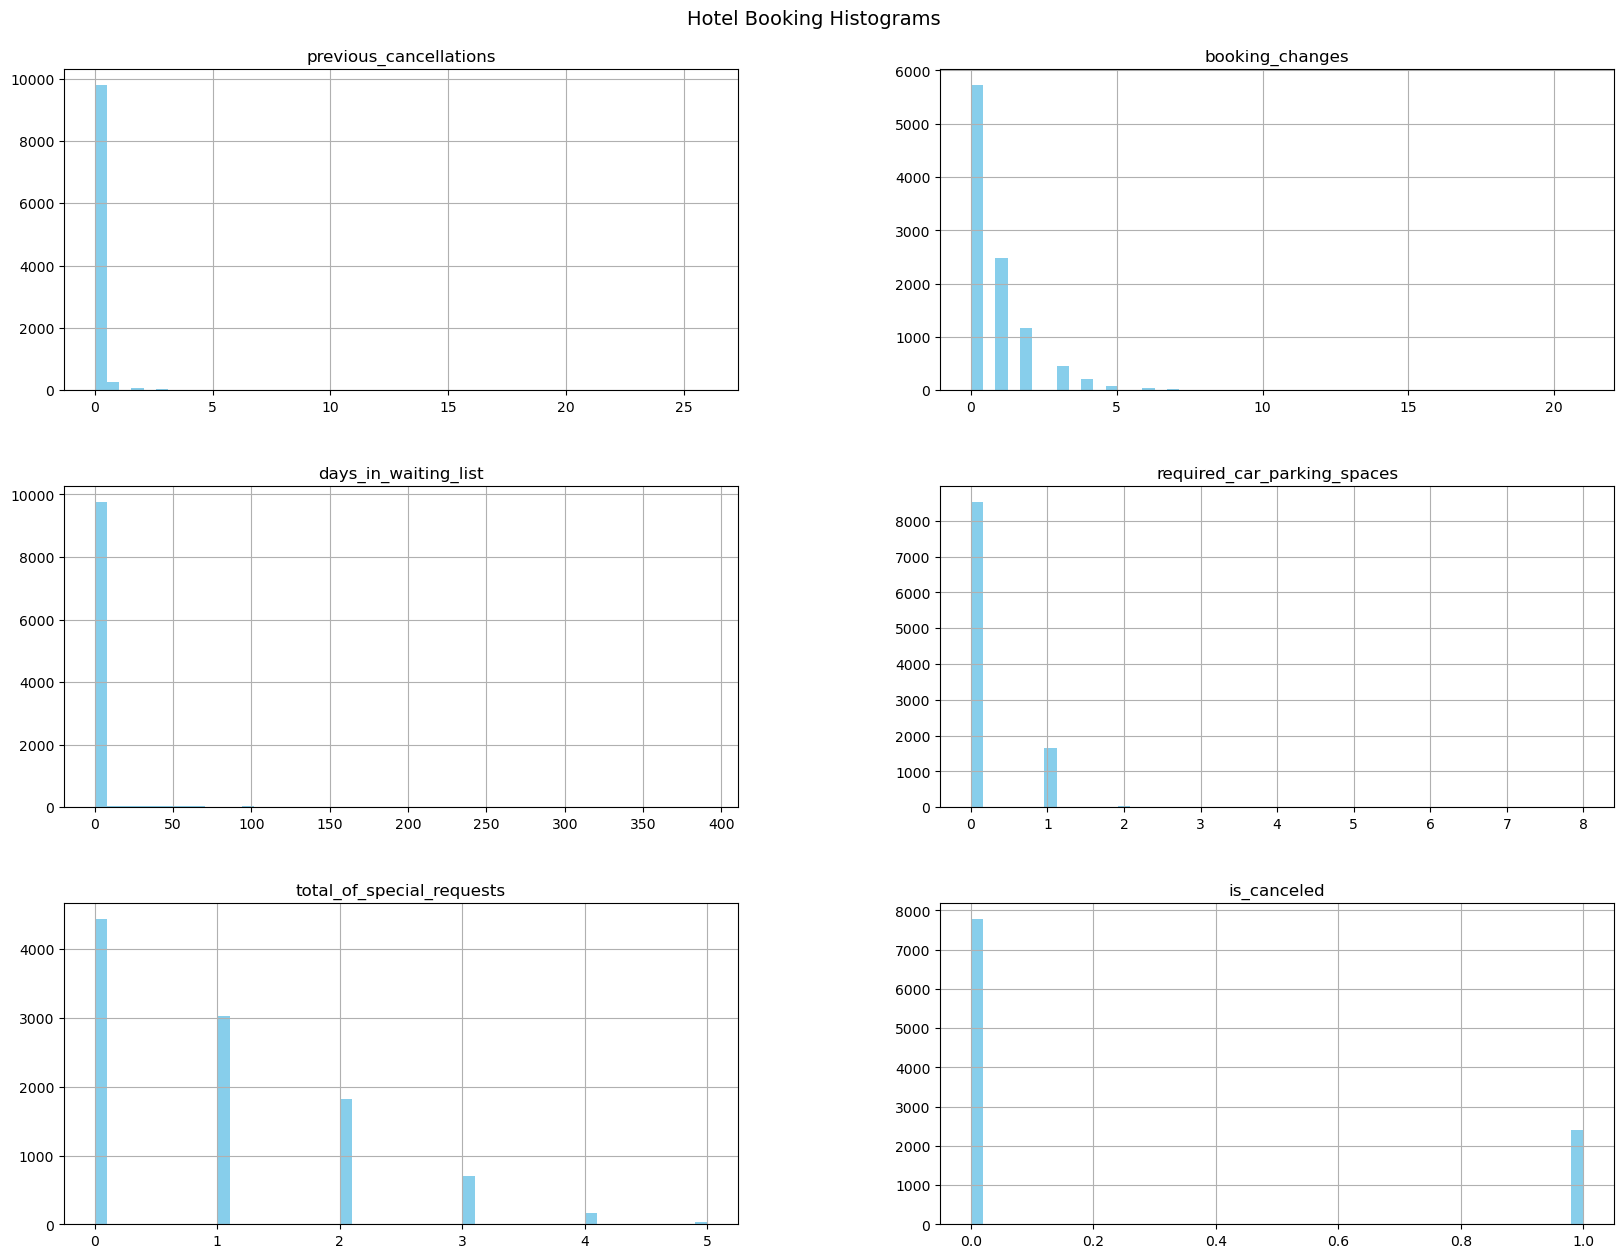

In [15]:
# Create histogram plot function
def plot_histograms(df, bins=60, figsize=(15,15), color='skyblue', title=None, title_fontsize=14, title_y=0.92):
    df.hist(bins=bins, figsize=figsize, color=color)
    plt.suptitle(title, fontsize=title_fontsize, y=title_y)
    plt.show()

plot_histograms(df, bins=50, figsize=(20,15), title='Hotel Booking Histograms')

- Secara keseluruhan, sebagian besar kolom numerikal dalam dataset ini menunjukkan distribusi yang tidak normal dan cenderung memiliki positive skew (*right-skewed*). Ini berarti sebagian besar data terkumpul di nilai-nilai rendah, dan terdapat ekor yang memanjang ke nilai-nilai yang lebih tinggi (nilai-nilai ekstrem atau outlier). 
- Informasi ini penting untuk dipertimbangkan saat memilih metode preprocessing data dan algoritma machine learning yang sesuai.

## **4.3 Target Variable Distribution (is_canceled)**

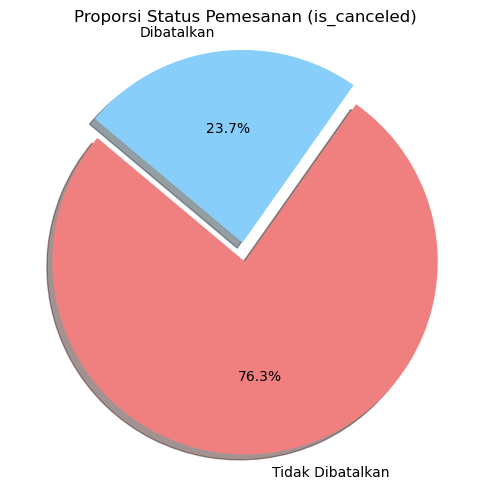

In [16]:
class_counts = df['is_canceled'].value_counts()
labels = ['Tidak Dibatalkan', 'Dibatalkan']
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0.1)  # Untuk sedikit menonjolkan slice 'Dibatalkan'

plt.figure(figsize=(5, 5))
plt.pie(class_counts,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True)  # Tambahkan shadow untuk efek visual
plt.title('Proporsi Status Pemesanan (is_canceled)')
plt.axis('equal')  # Membuat rasio aspek lingkaran menjadi sama
plt.tight_layout()
plt.show()

- Mayoritas pemesanan (76.3%) tidak dibatalkan, sementara hanya 23.7% yang dibatalkan.
- Distribusi kelas target is_canceled tidak seimbang, dengan kelas "Tidak Dibatalkan" jauh lebih dominan daripada kelas "Dibatalkan". Hal ini perlu dipertimbangkan dalam pemodelan untuk menghindari bias dan memilih metrik evaluasi yang tepat. Maka akan dilakukan resampling saad hyperparameter tunning nanti.

## **4.4 Numerical Feature Analysis**

Pada tahap ini, kita akan menyelidiki bagaimana fitur-fitur numerikal dalam dataset berhubungan dengan variabel target, yaitu `is_canceled` (status pembatalan pemesanan). Tujuan utama dari analisis ini adalah untuk mengidentifikasi apakah terdapat korelasi atau pola tertentu antara nilai-nilai numerik dengan kemungkinan terjadinya pembatalan. Pemahaman mengenai hubungan ini dapat membantu kita menentukan fitur-fitur numerikal mana saja yang berpotensi menjadi prediktor penting untuk perilaku pembatalan pelanggan.

#### **4.4.1 Correlation Matrix**

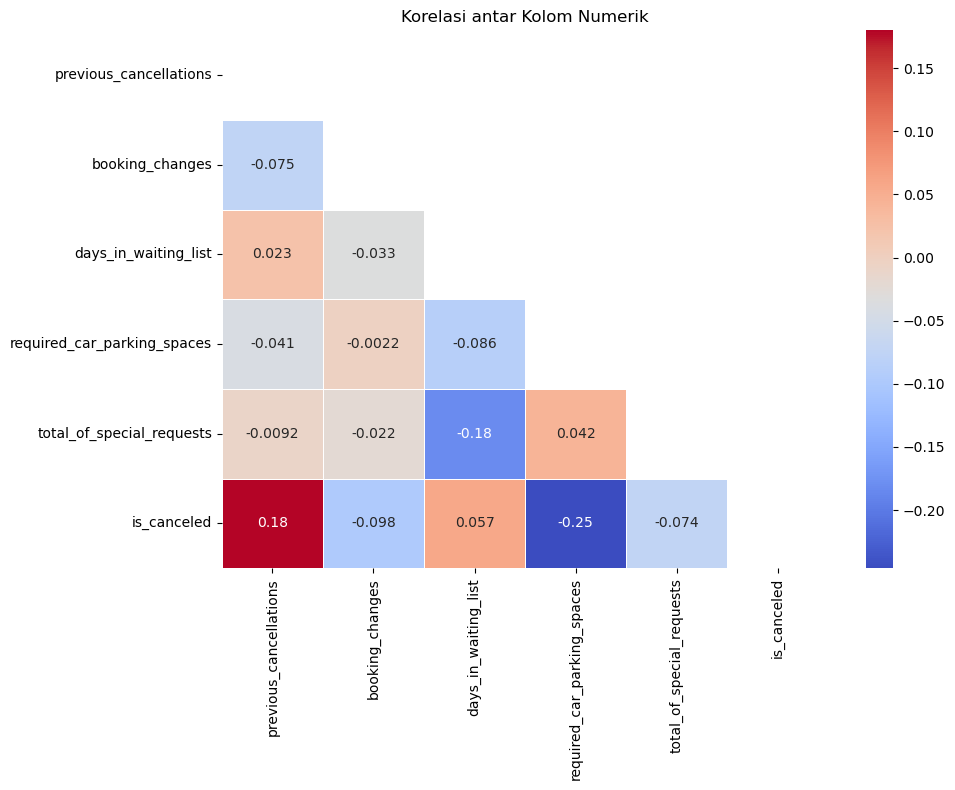

In [17]:
# Calculate correlation using Spearman method for numeric columns
correlation_data = df.select_dtypes(include='number').corr(method='spearman')

# Masking for upper triangle
masking = np.triu(np.ones_like(correlation_data, dtype=bool))

# Make the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_data, 
            mask=masking, 
            annot=True, 
            cmap='coolwarm', 
            linewidths=0.5)

plt.title('Korelasi antar Kolom Numerik')
plt.tight_layout()
plt.show()

Korelasi dengan `is_canceled`:

- `previous_cancellations` (0.18): Korelasi positif yang lemah mengindikasikan bahwa ada kecenderungan yang sedikit lebih tinggi bagi pelanggan yang pernah membatalkan pemesanan sebelumnya untuk juga membatalkan pemesanan saat ini. Meskipun lemah, ini menunjukkan riwayat pembatalan dapat menjadi indikator kecil risiko pembatalan di masa depan.

- `booking_changes` (-0.098): Korelasi negatif yang sangat lemah menunjukkan bahwa semakin banyak perubahan yang dilakukan pada pemesanan, kemungkinan pembatalannya sedikit menurun. Ini mungkin mengimplikasikan bahwa pelanggan yang melakukan perubahan lebih terlibat atau memiliki rencana yang lebih pasti.

- `days_in_waiting_list` (0.057): Korelasi positif yang sangat lemah mengindikasikan bahwa pemesanan yang lebih lama berada dalam daftar tunggu memiliki sedikit kecenderungan lebih tinggi untuk dibatalkan. Ini mungkin disebabkan oleh pelanggan yang menemukan alternatif lain selama masa tunggu.

- `required_car_parking_spaces` (-0.25): Korelasi negatif yang lemah hingga sedang menunjukkan bahwa pelanggan yang meminta tempat parkir mobil secara signifikan lebih kecil kemungkinannya untuk membatalkan. Permintaan parkir mungkin menjadi indikator rencana perjalanan yang lebih pasti dan kurang fleksibel.

- `total_of_special_requests` (-0.074): Korelasi negatif yang sangat lemah menunjukkan bahwa semakin banyak permintaan khusus yang dibuat pelanggan, semakin kecil kemungkinannya mereka untuk membatalkan. Ini mungkin mencerminkan keterlibatan dan antisipasi yang lebih tinggi terhadap masa inap mereka.

Korelasi Antar Fitur Numerik Lainnya:

- `days_in_waiting_list` dan `total_of_special_requests` (-0.18): Korelasi negatif lemah menunjukkan bahwa pemesanan yang lebih lama berada dalam daftar tunggu mungkin memiliki lebih sedikit permintaan khusus.

#### **4.4.2 Mann-Whitney U Test: Numerical Feature Association with Cancellation Status**

In [18]:
from scipy.stats import mannwhitneyu

num_features = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

for feat in num_features:

    stat, pvalue = mannwhitneyu(
        df[df['is_canceled']==0][feat],
        df[df['is_canceled']==1][feat],    
    )

    if pvalue < 0.05:
        hasil = 'Terkait'
    else:
        hasil = 'TIDAK Terkait'

    print(pvalue.round(4), f'\t is_canceled vs {feat} --> {hasil}')

0.0 	 is_canceled vs previous_cancellations --> Terkait
0.0 	 is_canceled vs booking_changes --> Terkait
0.0 	 is_canceled vs days_in_waiting_list --> Terkait
0.0 	 is_canceled vs required_car_parking_spaces --> Terkait
0.0 	 is_canceled vs total_of_special_requests --> Terkait


- Semua fitur numerik yang diuji (`previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, dan total_of_special_requests`) menunjukkan hubungan yang signifikan secara statistik dengan variabel target `is_canceled`. 
- Ini berarti bahwa distribusi nilai dari setiap fitur numerik tersebut berbeda secara signifikan antara pemesanan yang dibatalkan dan yang tidak dibatalkan.

#### **4.4.3 Visualization of Numerical Feature Distribution by Cancellation Status**

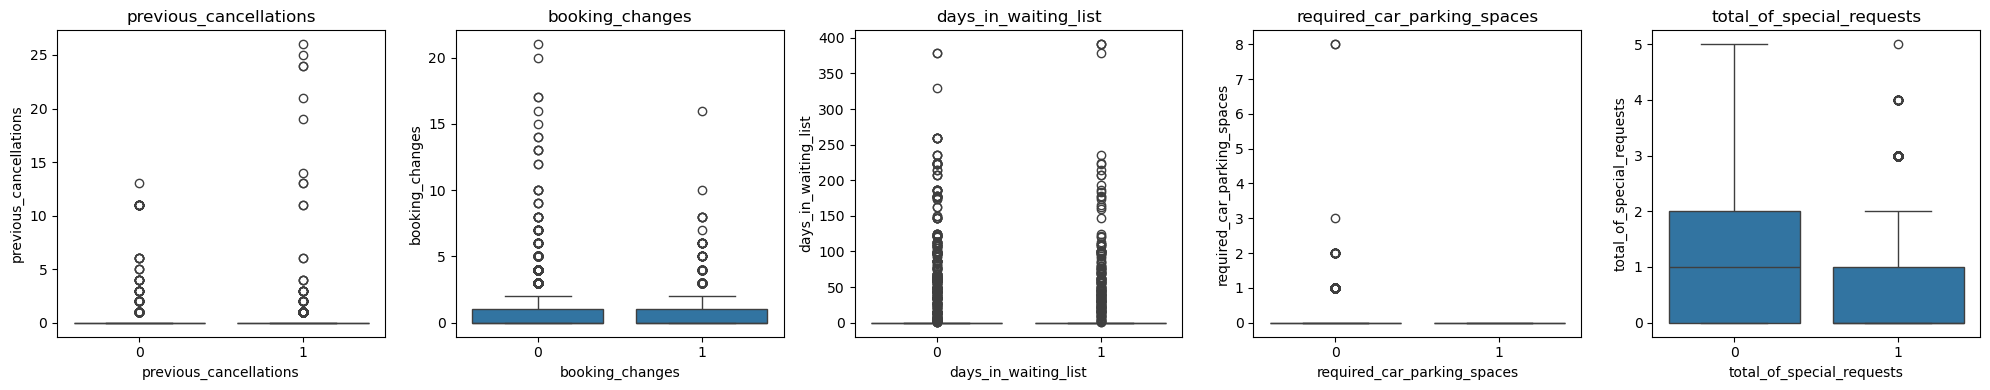

In [19]:
plt.figure(figsize=(20, 4))
plotnumber = 1

for feat in num_features:
    ax = plt.subplot(1, len(num_features), plotnumber)
    sns.boxplot(x='is_canceled', y=feat, data=df)
    plt.xlabel(feat)
    plt.title(feat)
    plotnumber += 1
    plt.tight_layout();

- `previous_cancellations`: Pelanggan yang membatalkan pemesanan cenderung memiliki lebih banyak riwayat pembatalan sebelumnya. Outlier (nilai sangat tinggi) pada kelompok yang tidak dibatalkan menunjukkan ada segelintir pelanggan dengan banyak riwayat pembatalan yang memutuskan untuk tidak membatalkan kali ini.

- `booking_changes`: Pemesanan yang tidak dibatalkan cenderung memiliki lebih banyak perubahan, menunjukkan adanya komitmen. Outlier di kedua kelompok menunjukkan adanya pemesanan dengan jumlah perubahan yang sangat tinggi.

- `days_in_waiting_list`: Meskipun sebagian besar tanpa tunggu, pemesanan yang dibatalkan seringkali punya masa tunggu yang sangat panjang. Outlier yang sangat tinggi pada kelompok yang dibatalkan menunjukkan bahwa penantian ekstrem dapat menjadi pemicu pembatalan.

- `required_car_parking_spaces`: Permintaan parkir mobil hampir selalu ada pada pemesanan yang tidak dibatalkan. Hampir tidak ada outlier positif pada kelompok yang dibatalkan, menekankan bahwa permintaan parkir adalah indikator kuat dari pemesanan yang akan dipertahankan.

- `total_of_special_requests`: Pelanggan dengan lebih banyak permintaan khusus cenderung tidak membatalkan pemesanan. Outlier pada kelompok yang tidak dibatalkan menunjukkan adanya pelanggan yang sangat spesifik dengan permintaan mereka, dan ini terkait dengan komitmen untuk tetap menginap.

## **4.5 Categorical Feature Analysis**

Pada tahap analisis ini, kita akan mengeksplorasi hubungan antara fitur-fitur kategorikal yang ada dalam dataset dengan variabel target, yaitu `is_canceled` (status pembatalan pemesanan). Tujuan utama dari analisis ini adalah untuk mengidentifikasi apakah terdapat keterkaitan atau asosiasi yang signifikan antara kategori-kategori dalam fitur-fitur dengan kemungkinan terjadinya pembatalan. Pemahaman mengenai hubungan ini akan membantu kita mengidentifikasi faktor-faktor kategorikal mana saja yang berpotensi menjadi indikator kuat terhadap perilaku pembatalan pelanggan.

#### **4.5.1 Chi-Square Analysis for Categorical Feature Association with 'is_canceled'**

In [20]:
from scipy.stats import chi2_contingency

categorical_features = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['is_canceled'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"p-value: {p_value:.4f} \t is_canceled vs {feature}")
    display(contingency_table)
    print()

p-value: 0.0000 	 is_canceled vs country


is_canceled,0,1
country,,
ABW,2,0
AGO,59,30
AIA,1,0
ALB,4,1
AND,1,4
...,...,...
VGB,0,1
VNM,3,2
ZAF,25,11



p-value: 0.0000 	 is_canceled vs market_segment


is_canceled,0,1
market_segment,,
Aviation,64,17
Complementary,152,29
Corporate,452,76
Direct,1748,388
Groups,699,149
Offline TA/TO,1262,220
Online TA,3411,1534
Undefined,0,1



p-value: 0.0000 	 is_canceled vs deposit_type


is_canceled,0,1
deposit_type,,
No Deposit,7734,2226
Non Refund,21,174
Refundable,33,14



p-value: 0.0000 	 is_canceled vs customer_type


is_canceled,0,1
customer_type,,
Contract,418,63
Group,223,21
Transient,4924,1987
Transient-Party,2223,343



p-value: 0.0000 	 is_canceled vs reserved_room_type


is_canceled,0,1
reserved_room_type,,
A,3602,1025
B,292,162
C,259,81
D,1544,498
E,986,282
F,532,188
G,431,122
H,141,51
L,1,1


- Terdapat hubungan yang signifikan secara statistik antara setiap fitur kategorikal yang diuji (`country, market_segment, deposit_type, customer_type, reserved_room_type`) dan status pembatalan pemesanan (`is_canceled`).
- Proporsi pembatalan pemesanan berbeda secara signifikan di antara kategori-kategori dalam setiap fitur kategorikal.

#### **4.5.2 Visualizing 'is_canceled' by Categorical Features**

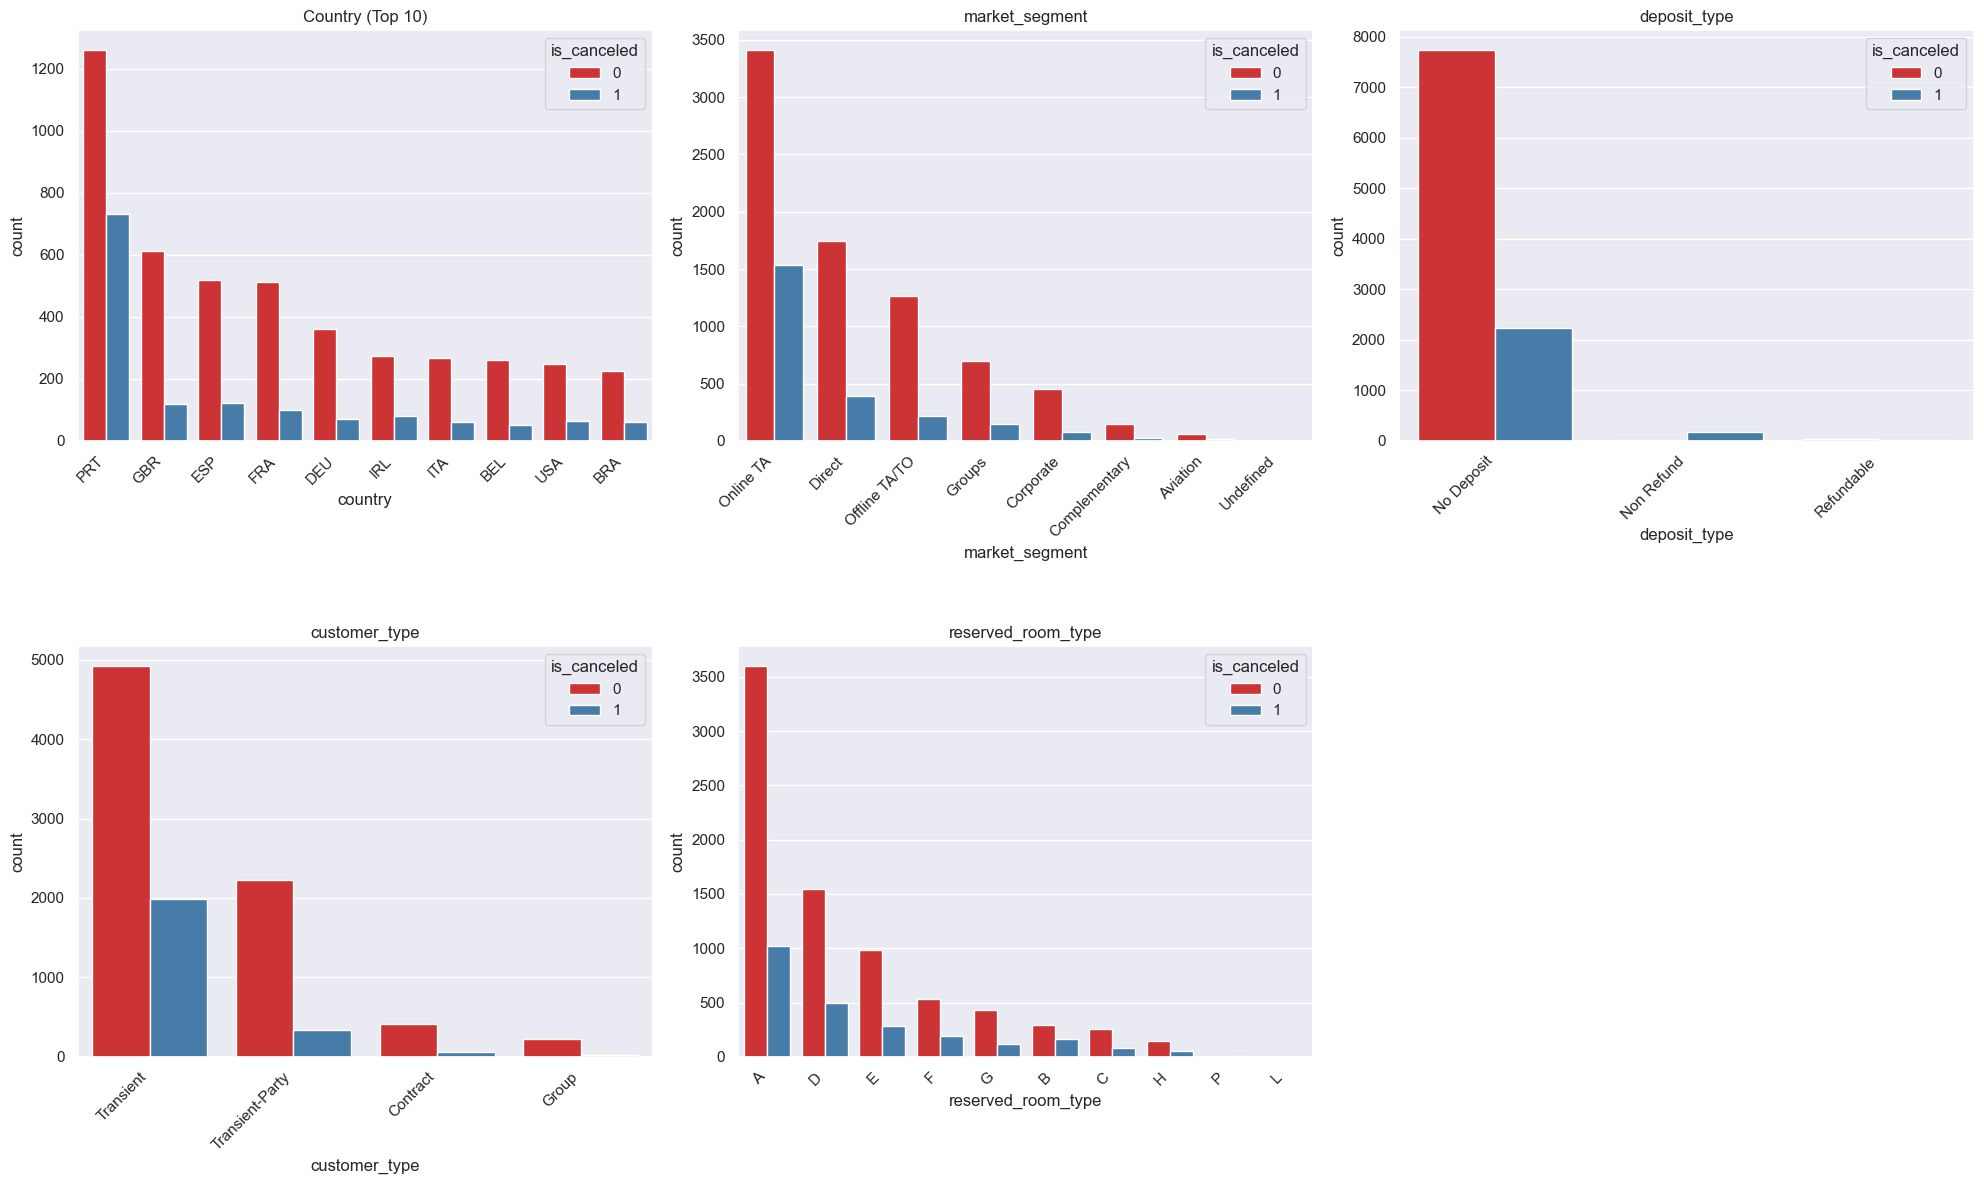

In [21]:
categorical_features = ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
plt.figure(figsize=(20, 12))
sns.set(palette='Set1')
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(2, 3, plotnumber)

    # Hitung frekuensi kategori dan ambil urutannya
    category_order = df[feature].value_counts().index

    if feature == 'country':
        # Ambil 10 negara teratas untuk ditampilkan
        top_10_countries = category_order[:10]
        df_plot = df[df['country'].isin(top_10_countries)]
        sns.countplot(x='country', hue='is_canceled', data=df_plot, order=top_10_countries)
        plt.xlabel('country')
        plt.title('Country (Top 10)')
        plt.xticks(rotation=45, ha='right')
    else:
        # Gunakan urutan frekuensi untuk fitur lainnya
        sns.countplot(x=feature, hue='is_canceled', data=df, order=category_order)
        plt.xlabel(feature)
        plt.title(feature)
        plt.xticks(rotation=45, ha='right')

    plotnumber += 1
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)

plt.show()

`country` (Top 10):

- Portugal (PRT) mendominasi volume pemesanan di antara 10 negara teratas, namun memiliki tingkat pembatalan yang cukup tinggi, menunjukkan potensi risiko pembatalan yang signifikan dari pasar ini.
- Negara-negara dengan volume pemesanan terkecil dalam 10 teratas (seperti IRL, BEL, USA) cenderung memiliki jumlah pembatalan yang lebih rendah secara absolut, meskipun proporsinya terhadap pemesanan yang tidak dibatalkan bervariasi.

`market_segment`:

- Segmen Online TA menghasilkan volume pemesanan terbesar namun juga tingkat pembatalan tertinggi, mengindikasikan karakteristik pelanggan atau penawaran di platform ini yang mendorong pembatalan.
- Segmen dengan volume pemesanan terkecil seperti Complementary dan Aviation menunjukkan jumlah pembatalan yang sangat rendah, meskipun persentase pembatalannya mungkin tinggi karena basis pemesanan yang kecil. Undefined memiliki volume dan pembatalan yang mendekati nol.

`deposit_type`:

- Tipe No Deposit menarik volume pemesanan yang sangat besar dengan tingkat pembatalan yang rendah, menunjukkan kebijakan ini efektif dalam mengamankan pemesanan.
- Tipe Refundable, dengan volume pemesanan terkecil, juga memiliki tingkat pembatalan yang rendah, menunjukkan bahwa pelanggan yang memilih opsi ini cenderung tidak membatalkan.

`customer_type`:

- Tipe Transient menyumbang mayoritas pemesanan dan juga tingkat pembatalan tertinggi, menunjukkan bahwa fleksibilitas rencana perjalanan menjadi faktor utama bagi segmen ini.
- Tipe Group, dengan volume pemesanan terkecil, juga memiliki tingkat pembatalan yang rendah, mengindikasikan komitmen kelompok terhadap pemesanan.

`reserved_room_type`:

- Tipe kamar A adalah yang paling banyak dipesan dan juga memiliki jumlah pembatalan yang signifikan, sejalan dengan volume pemesanannya yang tinggi.
- Tipe kamar dengan volume pemesanan terkecil seperti H, P, dan L memiliki jumlah pembatalan yang sangat sedikit, meskipun proporsi pembatalannya mungkin lebih tinggi karena basis pemesanan yang kecil.

# **5. Modelling and Evaluation**

Pada tahapan ini akan fokus pada pengembangan dan evaluasi model machine learning untuk memprediksi status pembatalan pemesanan (`is_canceled`). Proses dimulai dengan pra-pemrosesan data untuk mempersiapkan fitur agar sesuai dengan algoritma. Selanjutnya, beberapa model klasifikasi akan dilatih, kemudian dievaluasi kinerjanya menggunakan metrik yang relevan. Tujuan akhirnya adalah memilih model terbaik yang efektif dan dapat diandalkan untuk solusi prediktif.

[Sumber 4](https://towardsdatascience.com/tag/model-evaluation/)

## **5.1 Define X and y**

In [22]:
X = df.drop(columns='is_canceled')
X.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2


In [23]:
y = df['is_canceled']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: is_canceled, dtype: int64

- Dilakukan pengelompokan data dimana `is_canceled` adalah targetnya (y) dan 10 kolom lainnya adalah feature(X)
- Pemisahan data menjadi `X` (fitur/input model) dan `y` (target/output yang diprediksi) adalah langkah penting dalam machine learning. Tujuannya agar model belajar hanya dari fitur untuk memprediksi target, sehingga hasilnya akurat dan realistis.

## **5.2 Data Splitting**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

- **Pelatihan Model**: Model hanya dilatih menggunakan `X_train` dan `y_train`.

- **Evaluasi Model**: Setelah dilatih, model diuji performanya menggunakan `X_test` dan `y_test`. Hasil evaluasi pada `X_test` memberikan indikasi yang lebih realistis tentang bagaimana model akan bekerja di dunia nyata.

- `X`: Variabel independen (fitur) dari dataset Anda.

- `y`: Variabel dependen (target) dari dataset Anda.

- `test_size`: Menentukan proporsi data yang akan dialokasikan sebagai set pengujian (misalnya, 0.2 berarti 20% data untuk pengujian, 80% untuk pelatihan).

- `random_state`: Sebuah seed (bilangan acak awal) yang digunakan untuk memastikan hasil pembagian data selalu sama setiap kali kode dijalankan. Ini penting untuk reproduktifitas eksperimen.

- `stratify` (penting untuk masalah klasifikasi): Ketika stratify diatur ke variabel target (y), pembagian data akan memastikan bahwa proporsi kelas di set pelatihan dan set pengujian sama dengan proporsi kelas di dataset asli. Ini sangat penting, terutama jika dataset Anda memiliki ketidakseimbangan kelas (misalnya, jumlah pemesanan yang dibatalkan jauh lebih sedikit daripada yang tidak dibatalkan). Tanpa stratify, ada kemungkinan set pengujian hanya berisi satu kelas, yang akan menyebabkan evaluasi model yang tidak akurat.

## **5.3 Data Preprocessing**

In [25]:
X.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2


In [26]:
# Transformer scheme
transformer = ColumnTransformer([
    ('scaling', RobustScaler(), num_features),
    ('binary', BinaryEncoder(), categorical_features)
], remainder='passthrough')

Kode ini menyiapkan data untuk model machine learning dengan menerapkan dua jenis transformasi pada kolom yang berbeda:

- `'scaling', RobustScaler(), num_features`: Ini melakukan scaling (normalisasi) pada kolom-kolom numerik (num_features). `RobustScaler` dipilih karena efektif untuk data yang mungkin memiliki outlier, sehingga nilai-nilai numerik menjadi lebih stabil dan tidak didominasi oleh nilai ekstrem.

- `'binary', BinaryEncoder(), categorical_features`: Ini melakukan encoding pada kolom-kolom kategorikal (categorical_features) menjadi format numerik. `BinaryEncoder` akan mengubah setiap kategori menjadi representasi biner, yang cocok untuk algoritma machine learning.

- `remainder='passthrough'`: Ini berarti kolom-kolom lain yang tidak disebutkan dalam `num_features` atau `categorical_features` akan dibiarkan apa adanya dan disertakan dalam output.

In [27]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', RobustScaler(),
                                 ['previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests']),
                                ('binary', BinaryEncoder(),
                                 ['country', 'market_segment', 'deposit_type',
                                  'customer_type', 'reserved_room_type'])])

## **5.4 Model Benchmark**

In [28]:
# Define All Models
# Alghoritm Classification
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0) 

# Ensemble Various Type
# voting
voting = VotingClassifier(estimators=[
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
], voting="hard")

# stacking
stacking = StackingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
], final_estimator=logreg)

# Ensemble Similar Type
bagging = BaggingClassifier(random_state=0, estimator=knn)
rf = RandomForestClassifier(random_state=0) 
ada = AdaBoostClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0)

Kode ini mendefinisikan beberapa model klasifikasi yang akan digunakan dalam proyek machine learning. Model-model ini dibagi menjadi tiga kategori utama:

1. `Algoritma Klasifikasi Dasar`:

- **Logistic Regression** (logreg): Sebuah model linier sederhana yang sering digunakan sebagai baseline.
- **K-Nearest Neighbors** (knn): Model berbasis jarak yang mengklasifikasikan data berdasarkan mayoritas kelas tetangga terdekatnya.
- **Decision Tree** (tree): Model berbasis pohon keputusan yang membuat aturan klasifikasi dari data.

2. `Ensemble Various Type` (Ensemble Heterogen):

- **Voting Classifier** (voting): Menggabungkan prediksi dari beberapa model dasar (di sini logreg, knn, tree) untuk menghasilkan keputusan akhir melalui "voting" (misalnya, mayoritas suara). Metode yang digunakan adalah "hard voting", yang berarti memilih kelas yang paling banyak diprediksi.
- **Stacking Classifier** (stacking): Menggabungkan beberapa model dasar (di sini logreg, knn, tree) dengan model final estimator (logreg). Model dasar membuat prediksi, dan prediksi ini kemudian digunakan sebagai input untuk final estimator untuk membuat prediksi akhir.

3. `Ensemble Similar Type` (Ensemble Homogen):

- **Bagging Classifier** (bagging): Menggunakan beberapa instansi dari satu algoritma dasar (di sini knn) yang dilatih pada subset data yang berbeda (dengan bootstrapping) dan menggabungkan hasilnya.
- **Random Forest** (rf): Mirip dengan Bagging, tetapi secara spesifik menggunakan pohon keputusan sebagai model dasar dan memperkenalkan keacakan tambahan dalam pemilihan fitur.
- **AdaBoost Classifier** (ada): Sebuah metode boosting yang melatih serangkaian model dasar secara berurutan, di mana setiap model berikutnya lebih fokus pada kesalahan yang dibuat oleh model sebelumnya.
- **Gradient Boosting Classifier** (gbc): Metode boosting lain yang membangun model secara berurutan, secara bertahap memperbaiki prediksi sebelumnya.
- **XGBoost Classifier** (xgbc): Implementasi gradient boosting yang sangat efisien dan populer, dikenal karena kecepatan dan performanya yang tinggi.

Semua model yang didefinisikan ini akan dievaluasi menggunakan `cross-validation`. Model dengan nilai **mean (rata-rata) tertinggi** pada metrik evaluasi yang ditentukan akan dipilih sebagai model terbaik untuk tugas klasifikasi ini.

In [29]:
# Define scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

list_model = [logreg, knn, tree, voting, stacking, bagging, rf, ada, gbc, xgbc]
list_f2score_all = []
list_f2score_mean = []
list_f2score_std = []

# Resampling
smoteenn = SMOTEENN(random_state=0)

for model in list_model:
    # pipe_model
    pipe_model = Pipeline([
        ('preprocession', transformer),
        ('resampler', smoteenn),
        ("modeling", model)
    ])

    # cv
    cv_score = cross_val_score(
        estimator = pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring = f2_scorer
    )
    list_f2score_all.append(cv_score.round(2))
    list_f2score_mean.append(cv_score.mean())
    list_f2score_std.append(cv_score.std())

1. **Definisi Scorer:** Pertama, F2-`score` didefinisikan sebagai metrik evaluasi utama. Ini penting karena F2-score memberikan bobot lebih pada recall, yang relevan untuk masalah di mana mendeteksi semua kasus positif (misalnya, semua pembatalan) lebih penting daripada menghindari false positive.

2. **Daftar Model:** Berbagai model machine learning (seperti Logistic Regression, KNN, Decision Tree, serta metode ensemble seperti Voting, Stacking, Bagging, Random Forest, AdaBoost, Gradient Boosting, dan XGBoost) disiapkan untuk diuji.

3. **Resampling dengan SMOTEENN:**
- `SMOTEENN` adalah teknik resampling yang digunakan untuk mengatasi ketidakseimbangan data (misalnya, jumlah pemesanan yang dibatalkan jauh lebih sedikit dari yang tidak dibatalkan).
- SMOTEENN menggabungkan dua teknik:
    - **SMOTE (Synthetic Minority Over-sampling Technique):** Membuat sampel baru dari kelas minoritas (misalnya, yang dibatalkan) berdasarkan sampel yang ada, sehingga jumlah data kelas minoritas bertambah.
    - **Edited Nearest Neighbors (ENN):** Kemudian membersihkan dataset dengan menghapus sampel yang misclassified atau noisy dari kedua kelas (baik mayoritas maupun minoritas) yang berdekatan dengan batas keputusan.
- **Pemilihan SMOTEENN:** Teknik ini dipilih karena berdasarkan uji coba sebelumnya yaitu dengan ROS(RandomOverSampler) dan SMOTE saja, SMOTEENN memberikan hasil yang lebih baik. Ini menunjukkan bahwa kombinasi oversampling dan cleaning efektif dalam meningkatkan kemampuan model mengenali kelas minoritas.

4. **Proses Cross-Validation:**
- Untuk setiap model yang didefinisikan, sebuah Pipeline dibuat. Pipeline ini memastikan urutan langkah-langkah pra-pemrosesan (`transformer`), resampling (`smoteenn`), dan pelatihan model (`modeling`) selalu diterapkan secara konsisten.
- Kemudian, `cross_val_score` digunakan untuk mengevaluasi kinerja setiap model menggunakan cross-validation **(cv=5)** pada data pelatihan (`X_train`, `y_train`). Ini membagi data pelatihan menjadi 5 bagian, melatih model 5 kali (setiap kali menggunakan 4 bagian untuk pelatihan dan 1 bagian untuk validasi), dan menghitung F2-`score` untuk setiap iterasi.

5. **Penyimpanan Hasil:** `F2-score` dari setiap fold cross-validation, nilai rata-ratanya (`mean`), dan standar deviasinya (`std`) disimpan untuk analisis lebih lanjut. Ini membantu menentukan model mana yang memiliki kinerja rata-rata tertinggi dan paling konsisten.

In [30]:
df_cv = pd.DataFrame()
df_cv["model"] = list_model
df_cv["f2_scorer"] = list_f2score_all
df_cv["f2_scorer_mean"] = list_f2score_mean
df_cv["f2_scorer_std"] = list_f2score_std
df_cv

,model,f2_scorer,f2_scorer_mean,f2_scorer_std
0,LogisticRegression(random_state=0),"[0.69, 0.68, 0.7, 0.7, 0.68]",0.6906,0.0076
1,KNeighborsClassifier(),"[0.63, 0.64, 0.65, 0.66, 0.67]",0.6484,0.0124
2,DecisionTreeClassifier(random_state=0),"[0.63, 0.62, 0.64, 0.65, 0.63]",0.6350,0.0099
3,"VotingClassifier(estimators=[('clf1', Logistic...","[0.69, 0.67, 0.69, 0.7, 0.68]",0.6861,0.0094
4,"StackingClassifier(estimators=[('clf1', Logist...","[0.61, 0.63, 0.66, 0.65, 0.66]",0.6398,0.0191
5,BaggingClassifier(estimator=KNeighborsClassifi...,"[0.66, 0.65, 0.67, 0.66, 0.68]",0.6619,0.0108
6,RandomForestClassifier(random_state=0),"[0.67, 0.66, 0.68, 0.7, 0.69]",0.6783,0.0148
7,AdaBoostClassifier(random_state=0),"[0.69, 0.67, 0.71, 0.7, 0.68]",0.6901,0.0135
8,GradientBoostingClassifier(random_state=0),"[0.72, 0.7, 0.73, 0.73, 0.71]",0.7177,0.0106
9,"XGBClassifier(base_score=None, booster=None, c...","[0.66, 0.66, 0.68, 0.71, 0.7]",0.6786,0.0200


- Model `GradientBoost` dipilih menjadi model paling optimal karena memiliki nilai rata-rata paling tinggi.

## **5.5 Hyperparameter Tuning**

In [ ]:
# max_depth (kedalaman pohon)
# learning_rate (learning rate)
# n_estimators (jumlah pohon)
# subsample (jumlah baris train set tiap pohon (% dari total baris train set))
# max_features (jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set))
# min_samples_leaf (minimal jumlah data di leaf node)
# min_samples_split (minimal jumlah data di node yang akan di split)

max_depth = list(np.arange(2, 8)) # Fokus pada kedalaman yang lebih dangkal
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3] # Lebih banyak eksplorasi learning rate kecil
n_estimators = list(np.arange(100, 1000, 50)) # Lebih banyak estimator untuk learning rate kecil
subsample = list(np.arange(0.6, 1.0, 0.1)) # Rentang yang lebih sempit dan sering optimal
max_features = ['sqrt', 'log2', None] + list(np.arange(0.5, 1.0, 0.1)) # Opsi strategis dan persentase
min_samples_leaf = [1, 3, 5, 10] # Untuk mengontrol overfitting
min_samples_split = [2, 5, 10] # Untuk mengontrol overfitting

# Hyperparameter space GBC yang diperbarui
hyperparam_space_gbc = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__max_features': max_features,
    'model__min_samples_leaf': min_samples_leaf, 
    'model__min_samples_split': min_samples_split
}

# Benchmark model 
gbc = GradientBoostingClassifier(random_state=0)

# Create the algorithm chains
estimator_gbc = Pipeline([
    ('transformer', transformer),
    ('resampler', smoteenn),
    ('model', gbc)
])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator_gbc, 
    param_distributions = hyperparam_space_gbc, 
    cv = 5, 
    scoring = f2_scorer, 
    n_jobs = -1, 
    random_state=0,
    n_iter=100
)

In [33]:
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaling',
                                                                               RobustScaler(),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'total_of_special_requests']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['country',
                                                                                'market_segment',
                                                                                'deposit_type',
                                                                                'custom...
                                                                0.7999999999999999,
                                                                0.8999999999999999],
                                        'model__min_samples_leaf': [1, 3, 5,
                                                                    10],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 150, 200,
                                                                250, 300, 350,
                                                                400, 450, 500,
                                                                550, 600, 650,
                                                                700, 750, 800,
                                                                850, 900, 950],
                                        'model__subsample': [0.6, 0.7,
                                                             0.7999999999999999,
                                                             0.8999999999999999]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [34]:
pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head() 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.4252,0.2171,0.0710,0.0157,0.6000,300,2,5,sqrt,7,0.0100,"{'model__subsample': 0.6, 'model__n_estimators...",0.7284,0.7021,0.7391,0.7341,0.7238,0.7255,0.0128,1
61,11.5924,4.1562,0.3085,0.4641,0.7000,450,5,1,0.7000,5,0.0100,"{'model__subsample': 0.7, 'model__n_estimators...",0.7300,0.6986,0.7404,0.7345,0.7201,0.7247,0.0146,2
7,30.3191,4.6809,0.1085,0.0162,0.8000,700,2,10,0.6000,7,0.0050,"{'model__subsample': 0.7999999999999999, 'mode...",0.7124,0.6996,0.7420,0.7367,0.7320,0.7246,0.0160,3
97,11.0253,4.3448,0.0794,0.0116,0.9000,600,10,5,sqrt,5,0.0100,"{'model__subsample': 0.8999999999999999, 'mode...",0.7275,0.6986,0.7414,0.7299,0.7253,0.7246,0.0141,4
15,10.1852,1.4757,0.0742,0.0140,0.7000,400,10,10,0.6000,6,0.0010,"{'model__subsample': 0.7, 'model__n_estimators...",0.7296,0.7057,0.7377,0.7152,0.7301,0.7236,0.0116,5


In [35]:
print('GradientBoostingClassifier (GBC)')
print('Best_score:', random_gbc.best_score_)
print('Best_params:', random_gbc.best_params_)

GradientBoostingClassifier (GBC)
Best_score: 0.7255045010417417
Best_params: {'model__subsample': 0.6, 'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 5, 'model__max_features': 'sqrt', 'model__max_depth': 7, 'model__learning_rate': 0.01}


## **5.6. Predict to Data Test**

**Predict to Train**

In [36]:
# define pipe_model
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ('resampler', smoteenn),
    ("modeling", gbc)
])

# fitting to data train
pipe_model.fit(X_train, y_train)

# predict to data test
y_pred_before_train = pipe_model.predict(X_train)

# scoring
fbeta_score(y_train, y_pred_before_train, beta=2)

0.7266526757607555

**Before Tuning**

In [37]:
# define pipe_model
pipe_model = Pipeline([
    ("preprocessing", transformer),
    ('resampler', smoteenn),
    ("modeling", gbc)
])

# fitting to data train
pipe_model.fit(X_train, y_train)

# predict to data test
y_pred_before = pipe_model.predict(X_test)

# scoring
f2score_gbc_benchmark = fbeta_score(y_test, y_pred_before, beta=2)
f2score_gbc_benchmark

0.7062937062937062

**After Tuning**

In [38]:
# define pipe_model
final_model = random_gbc.best_estimator_

# fitting to data train
final_model.fit(X_train, y_train)

# predict to data test
y_pred_after = final_model.predict(X_test)

# scoring
f2score_gbc_tuning = fbeta_score(y_test, y_pred_after, beta=2)
f2score_gbc_tuning

0.7263339070567987

In [45]:
print(f2score_gbc_benchmark, 'GradientBoosting Benchmark')
print(f2score_gbc_tuning, 'GradientBoosting Tuning')

0.7062937062937062 GradientBoosting Benchmark
0.7263339070567987 GradientBoosting Tuning


**Classification Report**

In [46]:
print('GBoost Before Tuning')
print(classification_report(y_test, y_pred_before))

GBoost Before Tuning
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1558
           1       0.44      0.84      0.57       483

    accuracy                           0.70      2041
   macro avg       0.68      0.75      0.67      2041
weighted avg       0.81      0.70      0.73      2041



In [47]:
print('GBoost After Tuning')
print(classification_report(y_test, y_pred_after))

GBoost After Tuning
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1558
           1       0.43      0.87      0.58       483

    accuracy                           0.70      2041
   macro avg       0.69      0.76      0.67      2041
weighted avg       0.82      0.70      0.72      2041



**Confusion Matrix**

Text(0.5, 1.0, 'GBoost after tuning')

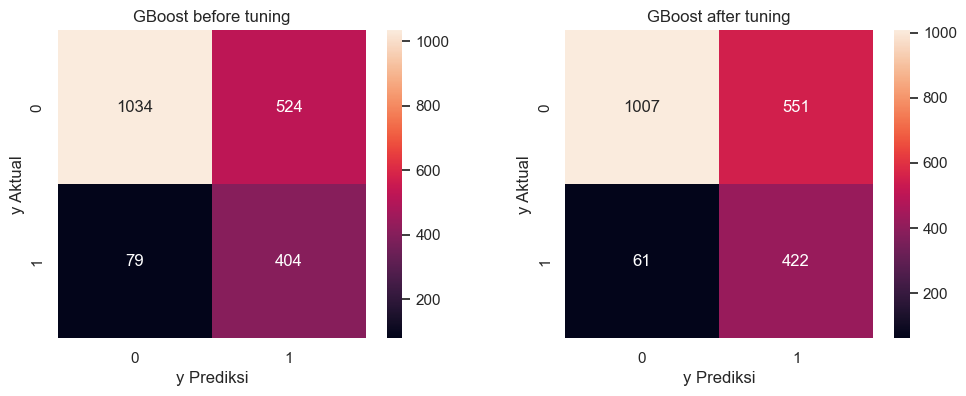

In [48]:
plt.figure(figsize=(12,4))

# Model GBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GBoost before tuning')

# Model GBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('GBoost after tuning')

## **5.7 Evaluation Summary**

**Tujuan Project**:

Menentukan apakah suatu pemesanan akan dibatalkan atau tidak, agar hotel bisa mengantisipasi:
- `False Positive (FP)` → hotel mengira akan dibatalkan → kamar dijual ulang → ternyata tamu tetap datang.
- `False Negative (FN)` → hotel mengira tamu akan datang → ternyata dibatalkan → kamar kosong & rugi.


**Sebelum Menggunakan Machine Learning**:

Hotel tidak tahu siapa yang akan membatalkan, sehingga mengambil kebijakan overbooking pada semua pesanan.

Asumsi:
- Jika dipesan → diasumsikan akan dibatalkan → kamar dijual ulang ke semua.
- Bila tamu tetap datang → ada risiko biaya kompensasi (upgrade, relokasi, dll) €25 per FP
- Bila tamu memang batal → tidak ada biaya → kamar sudah dijual ke orang lain.

Confusion Matrix (Tanpa ML):
|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 0             | 1558          |
| Actual (1)      | 0             | 483           |

Semua dianggap akan membatalkan

Biaya:
- Semua pemesanan diasumsikan dibatalkan → model prediksi 1 untuk semua (kolom kanan)
- FP = 1558 → artinya hotel menyangka 1558 akan batal, tapi ternyata datang → hotel rugi €25 x 1558 = €38,950
- Tidak ada FN karena semua dianggap cancel → tidak ada kamar kosong → tidak kehilangan pendapatan

`Total kerugian (tanpa ML) = €38,950`

**Setelah Menggunakan Machine Learning**

Dengan model prediktif, hotel bisa memilih pemesanan mana yang berisiko tinggi untuk dibatalkan dan melakukan strategi overbooking hanya pada yang perlu.

Confusion Matrix (Dengan ML):
|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 1007          | 551           |
| Actual (1)      | 61            | 422           |

Biaya:
- FP = 551 → hotel kira akan batal, ternyata tidak → rugi kompensasi €25 x 551 = €13,775
- FN = 61 → hotel kira akan datang, ternyata batal → kamar kosong, kehilangan €160 x 61 = €9,760

` Total kerugian (dengan ML) = €13,775 + €9,760 = €23,535`

**Efektivitas Model (Penghematan)**

- Kerugian **tanpa ML** = €38,950
- Kerugian **dengan ML** = €23,535
- **Penurunan kerugian** = €38,950 - €23,535 = €15,415
- **Persentase penghematan** = (15,415 / 38,950) × 100 ≈ 39.56%

## **5.8 Feature Importance**

In [39]:
final_model['model'].feature_importances_

array([0.05615082, 0.04436951, 0.00549369, 0.2519724 , 0.03553301,
       0.00044807, 0.00344168, 0.0188219 , 0.01500202, 0.02474748,
       0.03705237, 0.04997196, 0.03120549, 0.        , 0.06146339,
       0.08325551, 0.05325876, 0.01713621, 0.02148   , 0.04091585,
       0.0307694 , 0.09462998, 0.00055074, 0.00870942, 0.00577384,
       0.00784652])

In [40]:
final_model['transformer'].transformers_[0][2]

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [41]:
list(final_model['transformer'].transformers_[1][1].get_feature_names_out())

['country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2',
 'market_segment_3',
 'deposit_type_0',
 'deposit_type_1',
 'customer_type_0',
 'customer_type_1',
 'customer_type_2',
 'reserved_room_type_0',
 'reserved_room_type_1',
 'reserved_room_type_2',
 'reserved_room_type_3']

In [42]:
feat_scale = final_model['transformer'].transformers_[0][2]
feat_binary = list(final_model['transformer'].transformers_[1][1].get_feature_names_out())
# list(X.columns[xgbc_tuning['transformer'].transformers_[2][2]])

feat = feat_scale + feat_binary
feat

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2',
 'market_segment_3',
 'deposit_type_0',
 'deposit_type_1',
 'customer_type_0',
 'customer_type_1',
 'customer_type_2',
 'reserved_room_type_0',
 'reserved_room_type_1',
 'reserved_room_type_2',
 'reserved_room_type_3']

In [43]:
imp = pd.DataFrame({
    'feature':feat,
    'importance':final_model['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
3,required_car_parking_spaces,0.2520
21,customer_type_2,0.0946
15,market_segment_2,0.0833
14,market_segment_1,0.0615
0,previous_cancellations,0.0562
16,market_segment_3,0.0533
11,country_6,0.0500
1,booking_changes,0.0444
19,customer_type_0,0.0409
10,country_5,0.0371


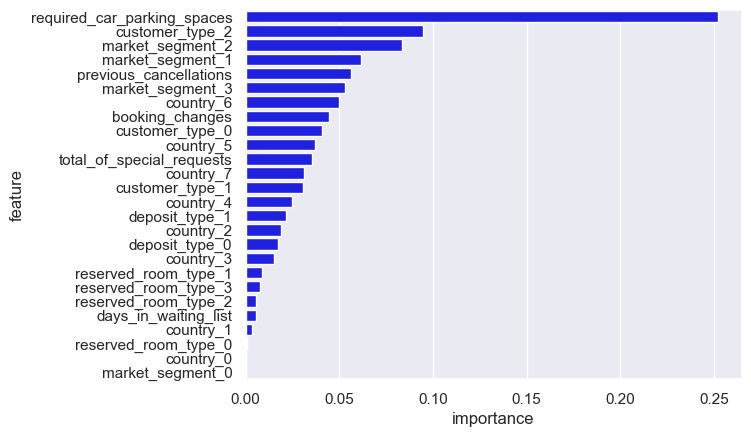

In [44]:
sns.barplot(data=imp, y='feature', x='importance', color='b');

- Dari tampilan Barplot untuk Feature Importance terlihat kolom `required_car_parking_spaces` urutan pertama yang memiliki nilai importance nya paling tinggi, diikuti oleh kolom `customer_type_2` dan `market_segment_2`
- Pada kolom/fitur `reserved_room_type_0`, `country_0`, dan `market_segment_0` berada diurutan 3 terakhir dengan nilai importance hampir mendekati 0.
- Untuk 3 Feature terbawah ini bisa kita hapus kedepannya apabila ingin melakukan modelling ulang karena Feature ini tidak terlalu berpengaruh ke hasil scoring nanti.

### **Menampilkan Feature Importance berdasarkan Shapley Value Explanation** (`SHAP`)

In [51]:
import shap

In [52]:
final_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country', 'market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('resampler', SMOTEENN(random_state=0)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            max_features='sqrt',
                                            min_samples_leaf=5,
                                            n_estimators=300, random_state=0,
                                            subsample=0.6))])

In [53]:
# ambil model dan data dari pipeline
my_model = final_model[-1]
my_data = final_model[0].transform(X_train)

# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

100%|===================| 8156/8161 [06:01<00:00]        

In [54]:
# ambil nama feature
feat

['previous_cancellations',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'country_0',
 'country_1',
 'country_2',
 'country_3',
 'country_4',
 'country_5',
 'country_6',
 'country_7',
 'market_segment_0',
 'market_segment_1',
 'market_segment_2',
 'market_segment_3',
 'deposit_type_0',
 'deposit_type_1',
 'customer_type_0',
 'customer_type_1',
 'customer_type_2',
 'reserved_room_type_0',
 'reserved_room_type_1',
 'reserved_room_type_2',
 'reserved_room_type_3']

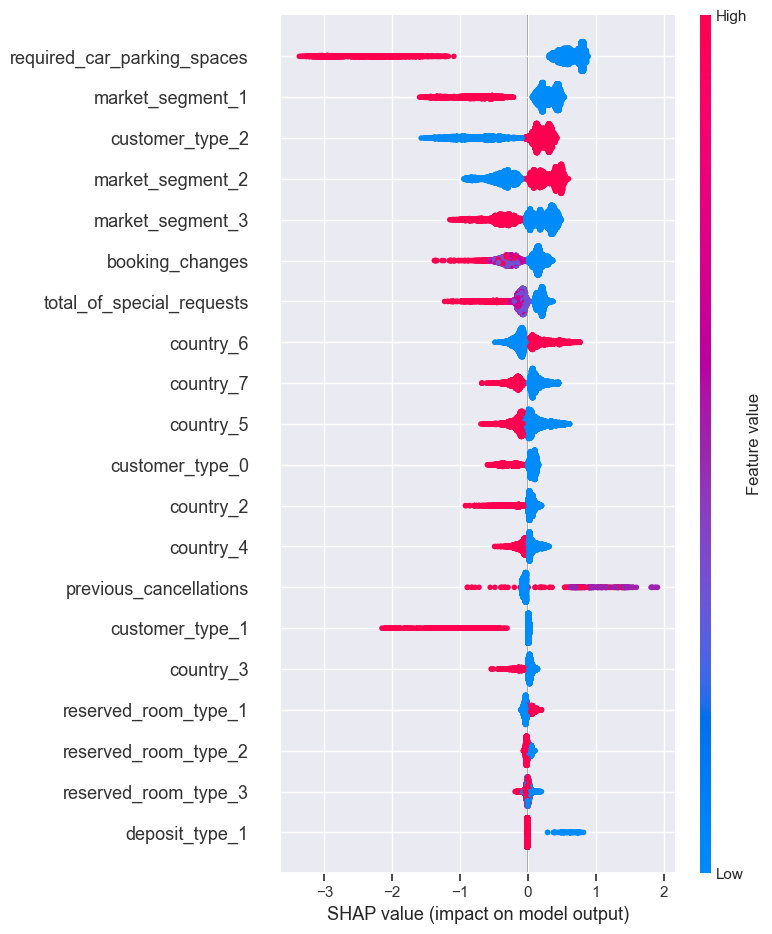

In [55]:
# tampilkan dalam bentuk plot                                 
shap.summary_plot(shap_values, my_data, feature_names=feat)

SHAP Summary Plot ini secara visual mengkonfirmasi dan memperjelas fitur-fitur paling berpengaruh yang ditemukan dalam analisis awal Anda, serta bagaimana nilai spesifik dari fitur-fitur tersebut memengaruhi keputusan model:

- Fitur seperti `required_car_parking_spaces`, `previous_cancellations`, `booking_changes`, dan `total_of_special_requests` adalah pendorong utama prediksi pembatalan atau tidak pembatalan.
- Pola warna (merah di kanan, biru di kiri) untuk `required_car_parking_spaces`, `booking_changes`, dan `total_of_special_requests` menunjukkan bahwa nilai tinggi pada fitur-fitur ini mengurangi kemungkinan pembatalan.
- Pola warna (biru di kanan, merah di kiri) untuk `previous_cancellations` menunjukkan bahwa nilai tinggi pada fitur ini meningkatkan kemungkinan pembatalan.
- Beberapa segmen pasar dan tipe pelanggan juga sangat berpengaruh, dengan beberapa kategori meningkatkan probabilitas pembatalan dan yang lain menurunkannya.

# **6. Conclusion**

## **6.1 Business Conclusion**

- Analisis data pemesanan hotel menunjukkan bahwa faktor-faktor seperti riwayat pembatalan sebelumnya, jumlah perubahan pemesanan, waktu tunggu, permintaan parkir, dan permintaan khusus memiliki keterkaitan signifikan dengan status pembatalan pemesanan.

- Secara finansial, kerugian akibat gagal memprediksi pembatalan (False Negative/FN) sebesar €160 per pemesanan jauh lebih tinggi dibandingkan biaya salah memprediksi pembatalan (False Positive/FP) sebesar €25 per pemesanan. Prioritas utama adalah meminimalkan kerugian FN.

- Penerapan Machine Learning terbukti sangat efektif dalam mengurangi potensi kerugian finansial. Model yang dikembangkan berhasil menurunkan total kerugian dari €38,950 (tanpa ML) menjadi €23,535 (dengan ML), merepresentasikan penurunan hampir sebesar **40%** meskipun masih ada kesalahan (FP & FN).

- Bisnis menjadi lebih efisien dan data-driven dalam mengelola risiko pembatalan.

## **6.2 Model Conclusion**

- Berbagai model klasifikasi, termasuk model dasar dan ensemble, telah dieksplorasi untuk memprediksi pembatalan pemesanan.

- Proses pra-pemrosesan data yang melibatkan scaling (RobustScaler) untuk fitur numerik dan encoding (BinaryEncoder) untuk fitur kategorikal adalah krusial untuk persiapan data.

- Penggunaan SMOTEENN untuk menangani ketidakseimbangan kelas adalah pendekatan yang efektif, karena ini menggabungkan oversampling minoritas dengan pembersihan noise untuk meningkatkan pembelajaran model pada kelas minoritas.

- Evaluasi model dilakukan secara komprehensif menggunakan cross-validation dengan metrik F2-score, yang secara strategis dipilih untuk memprioritaskan recall dan meminimalkan false negative sesuai tujuan bisnis.

- Hyperparameter tuning berhasil meningkatkan F2 Score pada data Test Set dari model dengan GradientBoosting sebesar 0.02. Performa model sebesar 0.72 bisa dikatakan belum bagus karena jumlah False Negative masih sekitar 1/7 dari total kelas 1 (is_canceled). 

- Model yang dioptimalkan berhasil mendistribusikan False Positive dan False Negative secara jauh lebih efisien dibandingkan skenario tanpa model, menghasilkan penghematan biaya yang signifikan.

# **7. Recommendation**

## **7.1 Business Recommendation**

- **Integrasi Model Prediksi:** Hotel disarankan untuk segera mengintegrasikan model Machine Learning ini ke dalam alur kerja manajemen pemesanan untuk prediksi proaktif.

- **Strategi Penjualan Kembali Proaktif:** Manfaatkan prediksi model untuk melakukan overbooking ringan yang terkontrol atau menjual kembali kamar secara proaktif, terutama untuk pemesanan yang diprediksi berisiko tinggi membatalkan, guna memaksimalkan tingkat okupansi dan pendapatan.

- **Insentif Pelanggan Berisiko:** Pertimbangkan untuk menawarkan insentif atau penawaran personal kepada pelanggan yang diprediksi berisiko tinggi membatalkan guna mendorong mereka tetap datang.

- **Fokus pada Fitur Penting:** Berikan perhatian khusus pada fitur-fitur yang paling berpengaruh terhadap pembatalan, seperti permintaan parkir, riwayat pembatalan sebelumnya, dan jumlah permintaan khusus, untuk menginformasikan strategi operasional dan pemasaran.

- **Analisis lebih lanjut:** Terhadap segmen pasar (market_segment), tipe pelanggan (customer_type), dan tipe kamar yang dipesan (reserved_room_type) karena SHAP plot menunjukkan bahwa fitur-fitur ini juga sangat memengaruhi probabilitas pembatalan. Pemahaman mendalam tentang perilaku masing-masing kategori dapat memicu strategi yang lebih bertarget.

- **Pemantauan dan Pembaruan Model Berkala:** Lakukan pemantauan kinerja model secara teratur dan perbarui model dengan data terbaru agar tetap akurat dan relevan dengan kondisi pasar yang terus berubah.

## **7.2 Model Recommendation**

- **Implementasi Model Terbaik:** Pilih dan implementasikan model dengan kinerja F2-score rata-rata tertinggi dari hasil cross-validation dan hyperparameter tuning.

- **Optimasi Threshold Klasifikasi:** Lakukan optimasi threshold probabilitas model pada validation set untuk mencapai keseimbangan optimal antara FP dan FN yang sesuai dengan prioritas biaya hotel.

- **Eksplorasi Fitur Lanjutan:** Lanjutkan eksplorasi dan rekayasa fitur tambahan yang berpotensi meningkatkan kinerja model, seperti informasi sentimen pelanggan atau data eksternal lainnya.

- **Penggunaan Metode Deep Learning:** Pertimbangkan untuk menguji dan menerapkan metode deep learning seperti neural network. Pendekatan ini mungkin dapat menghasilkan model dengan skor prediksi yang lebih tinggi, terutama jika dataset memiliki kompleksitas pola yang tidak linier.

- **Pengembangan Feature Engineering Baru:** Lakukan upaya lebih lanjut dalam membuat kombinasi feature engineering baru dari fitur-fitur yang sudah ada. Fitur-fitur hasil rekayasa ini dapat memiliki korelasi yang lebih tinggi dengan variabel target dan berpotensi meningkatkan performa model secara signifikan.

- **Pemanfaatan Data Lebih Besar dan Terbaru:** Menggunakan data pemesanan yang lebih besar dan terkini dapat secara signifikan meningkatkan kinerja model. Dengan volume data yang lebih banyak, diharapkan distribusi kelas minoritas (pembatalan) dapat lebih terwakili, sehingga berpotensi mengurangi tingkat imbalance data dan menghasilkan skor prediksi yang lebih tinggi.

# **Save Final Model**

In [60]:
# define
gradient_boost = random_gbc.best_estimator_

# fitting
gradient_boost.fit(X, y)

# saving
pickle.dump(gradient_boost, open("model_gradient.sav", "wb"))

In [61]:
# load model

model_loaded = pickle.load(open("model_gradient.sav", "rb"))
model_loaded

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country', 'market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type'])])),
                ('resampler', SMOTEENN(random_state=0)),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=7,
                                            max_features='sqrt',
                                            min_samples_leaf=5,
                                            n_estimators=300, random_state=0,
                                            subsample=0.6))])

In [62]:
X.iloc[[9]]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
10,CN,Groups,0,1,No Deposit,0,Transient-Party,A,0,1


In [63]:
y.iloc[9]

0

In [64]:
model_loaded.predict(X.iloc[[9]])

array([0], dtype=int64)

In [65]:
y_pred = model_loaded.predict(X)

In [68]:
fbeta_score(y, y_pred, beta=2)

0.7299270072992701